# Heatmap between Input

In [1]:
import pandas as pd

csv_characteristic_path = "runs/raw/tencent/characteristic/1063/1m/characteristic.csv"

csv_characteristic = pd.read_csv(csv_characteristic_path)

In [5]:
import pandas as pd
path = "/home/cc/clio/6350_6650_readonly_10k_sampled.csv"

# read that, and turn to parquet, see all the columns first
df = pd.read_csv(path)
# keep windows 0 - 150 only
df.columns
# drop columns 
# df = df[df["window"] <= 150]
# df.to_parquet("6350_6500_readonly_10k_sampled.parquet")

Index(['ts_record', 'size', 'offset', 'ts_submit', 'size_after_replay',
       'queue_len', 'prev_queue_len_1', 'prev_queue_len_2', 'prev_queue_len_3',
       'prev_latency_1', 'prev_latency_2', 'prev_latency_3',
       'prev_throughput_1', 'prev_throughput_2', 'prev_throughput_3',
       'latency', 'reject', 'window'],
      dtype='object')

In [ ]:
from pathlib import Path
import glob
import re
from matplotlib import pyplot as plt
import seaborn as sns

path_to_glob = "/home/cc/clio/runs/raw/alibaba/characteristic_selected"

columns_avg = ['iops','iat_avg','size_avg', 'offset_avg', 'read_count', 'write_count']
columns_p90 = ['iops','iat_p90','size_p90', 'offset_p90', 'read_count', 'write_count']

# find /raw directories
for path in Path(path_to_glob).rglob("1m"):
    print(path)
    csv_read_path = path / "characteristic.csv"
    df = pd.read_csv(csv_read_path)
    device_id = re.search(r"(\d+)", str(path)).group(1)
    
    # Prepare the data
    df_avg = df[columns_avg]
    df_p90 = df[columns_p90]
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Heatmap for the average values
    sns.heatmap(df_avg.corr(), annot=True, cmap='coolwarm', ax=axes[0])
    axes[0].set_title('Heatmap of Average Values\nDevice ID: ' + device_id)

    # Heatmap for the p90 values
    sns.heatmap(df_p90.corr(), annot=True, cmap='coolwarm', ax=axes[1])
    axes[1].set_title('Heatmap of P90 Values\nDevice ID: ' + device_id)

    # Display the plot
    plt.tight_layout()
    plt.show()

    
    
    
# print(start_indices)
# print(end_indices)
# print(types)


In [ ]:
# For every start and end index, get the corresponding rows from the csv_characteristic

columns_avg = ['iops','iat_avg', 'read_count', 'write_count','size_avg', 'offset_avg', 'duration']
columns_p90 = ['iops','iat_p90', 'read_count', 'write_count','size_p90', 'offset_p90', 'duration']

columns_to_plot = [{"name": "AVG", "column":columns_avg}, {"name": "P90", "column":columns_p90}]
for start, end, type in zip(start_indices, end_indices, types):
    # get csv starting from start, up to end
    # do it by index
    csv_range = csv_characteristic[start:end]
    # Plot a heatmap of all numeric columns
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    # get the numeric columns
    numeric_columns = csv_range.select_dtypes(include=np.number)
    # Determine the number of columns to plot
    num_plots = len(columns_to_plot)
    num_cols = 2  # Adjust this to set the number of columns in your subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

    # Flatten axes array for easy iteration if it's a 2D array
    axes = axes.flatten()

    for i, column_json in enumerate(columns_to_plot):
        # plot the heatmap
        name_plot = column_json["name"]
        columns = column_json["column"]
        # make heatmap color scheme blue and red
        
        sns.heatmap(numeric_columns[columns].corr(), annot=True, ax=axes[i], cmap="coolwarm")
        # sns.heatmap(numeric_columns[columns].corr(), annot=True, ax=axes[i])
        axes[i].set_title(f"{name_plot} {type} {start}_{end}")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    
    

# Heatmap Input & Latency / Rejects

In [2]:
from pathlib import Path
import glob

dir_results = "/home/cc/clio/runs/raw/alibaba/characteristic/"

# Use glob to recursively find all results.csv files
csv_paths = []
for path in glob.iglob(f"{dir_results}/**/*.csv", recursive=True):
    csv_paths.append(path)

csv_paths

['/home/cc/clio/runs/raw/alibaba/characteristic/804/1m/characteristic.csv',
 '/home/cc/clio/runs/raw/alibaba/characteristic/79/1m/characteristic.csv',
 '/home/cc/clio/runs/raw/alibaba/characteristic/740/1m/characteristic.csv',
 '/home/cc/clio/runs/raw/alibaba/characteristic/4/1m/characteristic.csv',
 '/home/cc/clio/runs/raw/alibaba/characteristic/206/1m/characteristic.csv']

In [ ]:
import pandas as pd
import re

for path in csv_paths:
    print(path)
    type=""
    start=""
    end=""
    # device id is string afer /characteristic
    device_id=re.search(r"characteristic/(\d+)", str(path)).group(1)
    # get the start and end indices, use regex and extract \d+_\d+
    # regex_match = re.search(r"\d+_\d+", str(path))
    # # search for gradual, sudden, incremental, or recurring
    # type = re.search(r"gradual|sudden|incremental|recurring|", str(path)).group(0)
    # start = int(regex_match.group(0).split("_")[0])
    # end = int(regex_match.group(0).split("_")[1])
    print("Start index: ", start, " End index: ", end, " Type: ", type)
    
    df_full = pd.read_csv(path)

    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    
    # make everything bigger and thicker

    # plot a line plot, with x axis being 'chunk' and y axis being 'iops' and 'latency_avg'
    # sns.lineplot(data=df_full, x='chunk', y='iops')
    # sns.lineplot(data=df_full, x='chunk', y='latency_avg')
    # sns.lineplot(data=df_full, x='chunk', y='latency_p90')
    # sns.lineplot(data=df_full, x='chunk', y='latency_p99')
    
    # # legend
    # plt.legend(["iops", "latency_avg", "latency_p90", "latency_p99"])
    # plt.title(f"{type} {start}_{end}")
    
    fig, ax1 = plt.subplots(figsize=(25,10))

    # Plot IOPS on the primary y-axis
    sns.lineplot(data=df_full, x='chunk', y='iops', ax=ax1, label='iops', color='b')

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    sns.lineplot(data=df_full, x='chunk', y='write_iops', ax=ax2, label='write_iops', color='r', alpha=0.4)
    sns.lineplot(data=df_full, x='chunk', y='read_iops', ax=ax2, label='read_iops', color='g', alpha=0.4)

    # # # Plot latency metrics on the secondary y-axis
    # sns.lineplot(data=df_full, x='chunk', y='latency_avg', ax=ax2, label='latency_avg')
    # sns.lineplot(data=df_full, x='chunk', y='latency_p90', ax=ax2, label='latency_p90')
    # sns.lineplot(data=df_full, x='chunk', y='latency_p95', ax=ax2, label='latency_p95', color='g')
    # sns.lineplot(data=df_full, x='chunk', y='latency_p99', ax=ax2, label='latency_p99', color='y')
    # sns.lineplot(data=df_full, x='chunk', y='latency_p100', ax=ax2, label='latency_p100', color='r')
    
    # sns.lineplot(data=df_full, x='chunk', y='throughput_avg', ax=ax2, label='throughput_avg')
    # sns.lineplot(data=df_full, x='chunk', y='throughput_p90', ax=ax2, label='throughput_p90')
    # sns.lineplot(data=df_full, x='chunk', y='throughput_p95', ax=ax2, label='throughput_p95', color='g')
    # sns.lineplot(data=df_full, x='chunk', y='throughput_p99', ax=ax2, label='throughput_p99', color='y')
    # sns.lineplot(data=df_full, x='chunk', y='throughput_p100', ax=ax2, label='troughput_p100', color='r')

    # Set axis labels
    ax1.set_xlabel('chunk')
    ax1.set_ylabel('iops', color='b')
    ax2.set_ylabel('latency', color='g')
    # Sum all Read Counts and Write Counts
    sum_read = df_full['read_count'].sum()
    sum_write = df_full['write_count'].sum()

    # Set title
    plt.title(f"{type} {start}_{end} Alibaba: Device {device_id} R/W Ratio: {sum_read/sum_write}")

    # Combine legends
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc=0)
    
    
    


    plt.tight_layout()
    plt.show()
    
    

# Heatmap with Model

In [13]:
experiments_path = "runs/exp/tencent/1063/1m/iops/experiments"

# loop for results.csv
exp_csvs = []

for path in Path(experiments_path).rglob("results.csv"):
    exp_csvs.append(path)

In [38]:
# id is in following format incremental_3000-3800
import re
import pandas as pd

df_compiled_exp = pd.DataFrame()

for path in exp_csvs:
    path = str(path)
    # print(path) if "retrain" in path else None
    # search for sudden, gradual, incremental, or recurring
    type = re.search(r'(sudden|gradual|incremental|recurring)', path).group(1)
    algo = "retrain" if "retrain" in path else "no_retrain"
    range_res = re.search(r'(\d+)_(\d+)', path)
    start = range_res.group(1)
    end = range_res.group(2)
    
    df_csv = pd.read_csv(path)
    print(df_csv["accuracy"], path) if "8700" in path else None
    
    # add to df_compiled
    df_csv['id'] = f"{type}_{start}-{end}"
    df_csv['algo'] = algo
    # make chunk_number column, range from 0 to len(df_csv)
    df_csv['chunk_number'] = df_csv.index
    df_compiled_exp = pd.concat([df_compiled_exp, df_csv])
    

0      0.759947
1      0.738497
2      0.758963
3      0.751005
4      0.773182
         ...   
146    0.433824
147    0.512438
148    0.836066
149    0.388889
150    0.659033
Name: accuracy, Length: 151, dtype: float64 runs/exp/tencent/1063/1m/iops/experiments/gradual/8700_8850/single.initial-only/results.csv
0      0.759947
1      0.738497
2      0.770837
3      0.754690
4      0.780124
         ...   
146    0.882353
147    0.756219
148    0.721311
149    0.500000
150    0.806616
Name: accuracy, Length: 151, dtype: float64 runs/exp/tencent/1063/1m/iops/experiments/gradual/8700_8850/single.retrain.window/results.csv


In [39]:
dir_results = "char_replayed_full/"

csv_paths=[]
from pathlib import Path
import glob

df_char = pd.DataFrame()
# get every results.csv in this dir_results folder, recursive, do it by globbing
for path in glob.iglob(dir_results + '/**/per_window_characteristics.csv', recursive=True):
    # get the start and end indices, use regex and extract \d+_\d+
    regex_match = re.search(r"\d+_\d+", str(path))
    # search for gradual, sudden, incremental, or recurring
    type = re.search(r"gradual|sudden|incremental|recurring", str(path)).group(0)
    start = int(regex_match.group(0).split("_")[0])
    end = int(regex_match.group(0).split("_")[1])
    
    df_char_temp = pd.read_csv(path)
    df_char_temp["id"] = f"{type}_{start}-{end}"
    df_char_temp["chunk_number"] = df_char_temp.index
    df_char = pd.concat([df_char, df_char_temp])
    
    

In [40]:
print(len(df_char))
print(len(df_compiled_exp))

4692
9370


In [41]:
# merge on 'id' and 'chunk_number'
df_final = pd.merge(df_compiled_exp, df_char, on=['id', 'chunk_number'])

In [ ]:
# Heatmap correlation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns_avg = ['iops', 'iat_avg', 'reject_count', 'reject_ratio', 'accept_count', 'accept_ratio', 'read_count', 'write_count', 'size_avg', 'offset_avg', 'latency_avg', 'throughput_avg', 'duration']
columns_p90 = ['iops', 'iat_p90', 'reject_count', 'reject_ratio', 'accept_count', 'accept_ratio', 'read_count', 'write_count', 'size_p90', 'offset_p90', 'latency_p90', 'throughput_p90', 'duration']
target_metrics = ['accuracy', 'auc']

unique_id = df_final['id'].unique()


for id in unique_id:
    if "8700" not in id:
        continue
    
    df_id = df_final[df_final['id'] == id]
    print(df_id)
    
    
    df_pivot_accuracy = df_id.pivot(index='chunk_number', columns='algo', values='accuracy')
    df_pivot_auc = df_id.pivot(index='chunk_number', columns='algo', values='auc')
    
    # Rename columns to include 'accuracy_' and 'auc_' prefixes
    df_pivot_accuracy.columns = [f'accuracy_{algo}' for algo in df_pivot_accuracy.columns]
    df_pivot_auc.columns = [f'auc_{algo}' for algo in df_pivot_auc.columns]
    
    # Combine the pivoted dataframes
    df_pivot_combined = pd.concat([df_pivot_accuracy, df_pivot_auc], axis=1)
    
    # Reset index to make 'chunk_number' a column again
    df_pivot_combined.reset_index(inplace=True)
    
    # Merge the combined pivoted dataframe with the columns_avg data
    df_to_plot = df_id[list(set(['chunk_number']+columns_avg+columns_p90))].drop_duplicates().merge(df_pivot_combined, on='chunk_number')
 
    # Compute the correlation matrix
    # drop chunk_ number
    # df_to_plot = df_to_plot.drop(columns=['chunk_number'])
    corr_matrix = df_to_plot.corr()
    
    # Target_metrics, see columns only if they contain str in target_metric
    target_metric_cols = [col for col in corr_matrix.columns if any(metric in col for metric in target_metric)]
    
    sub_corr_matrix = corr_matrix.loc[target_metric_cols, :]
    
    # Plot the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(sub_corr_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Heatmap for ID {id}")
    plt.show()
    
    # Line plot, accuracy and auc
    # Plot the lineplot
    plt.figure(figsize=(15, 10))
    sns.lineplot(data=df_to_plot, x='chunk_number', y='accuracy_retrain')
    sns.lineplot(data=df_to_plot, x='chunk_number', y='accuracy_no_retrain')
    plt.title(f"Accuracy over time for ID {id}")
    

In [ ]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re

path_to_char = '/home/cc/clio/runs/raw/tencent/characteristic/1360'
time_granularity = ['1m', '5m','10m', '30m']

for time in time_granularity:
    for path in Path(path_to_char).rglob(time):

        for path in Path(path).rglob("*.csv"):
            # read csv
            df = pd.read_csv(path)
            # plot lineplot, iops
            plt.figure(figsize=(20, 4))
            sns.lineplot(data=df, x=df.index, y='iops')
            
            minute_from_time = re.search(r"(\d+)m", time).group(1)
            
            # have a vertical axis every 24 hours
            vertical_ticks = [i for i in range(0, len(df), int(1440/int(minute_from_time)))]
            
            
            # plot vertical ticks, red, stripped/dotted
            for tick in vertical_ticks:
                plt.axvline(x=tick, color='r', linestyle=':')
             
            # title minute granularity
            device_id = re.search(r"characteristic/(\d+)", str(path)).group(1)
            plt.title(f"Tencent Device:{device_id} Granularity:{time} IOPS")
            # have x axis title, chunk
            plt.xlabel('Chunk')
            plt.show()

In [ ]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

path_to_char = '/home/cc/clio/runs/raw/tencent/characteristic/1360'
time_granularity = ['1m', '5m','10m', '30m']

fig, axes = plt.subplots(len(time_granularity), 1, figsize=(20, 4 * len(time_granularity)))

for i, time in enumerate(time_granularity):
    for path in Path(path_to_char).rglob(time):
        for path in Path(path).rglob("*.csv"):
            # Read csv
            df = pd.read_csv(path)

            # Plot lineplot, iops
            sns.lineplot(data=df, x=df.index, y='iops', ax=axes[i])

            minute_from_time = re.search(r"(\d+)m", time).group(1)

            # Add vertical ticks every 24 hours
            vertical_ticks = [i for i in range(0, len(df), int(1440 / int(minute_from_time)))]

            # Plot vertical ticks, red, stripped/dotted
            for tick in vertical_ticks:
                axes[i].axvline(x=tick, color='r', linestyle=':')

            # Title minute granularity
            device_id = re.search(r"characteristic/(\d+)", str(path)).group(1)
            axes[i].set_title(f"Tencent Device: {device_id} Granularity: {time} IOPS")

            # Set x axis label
            axes[i].set_xlabel('Timestamp')

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_3269427/331526633.py:16: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


44640
8928
4464
1488
744


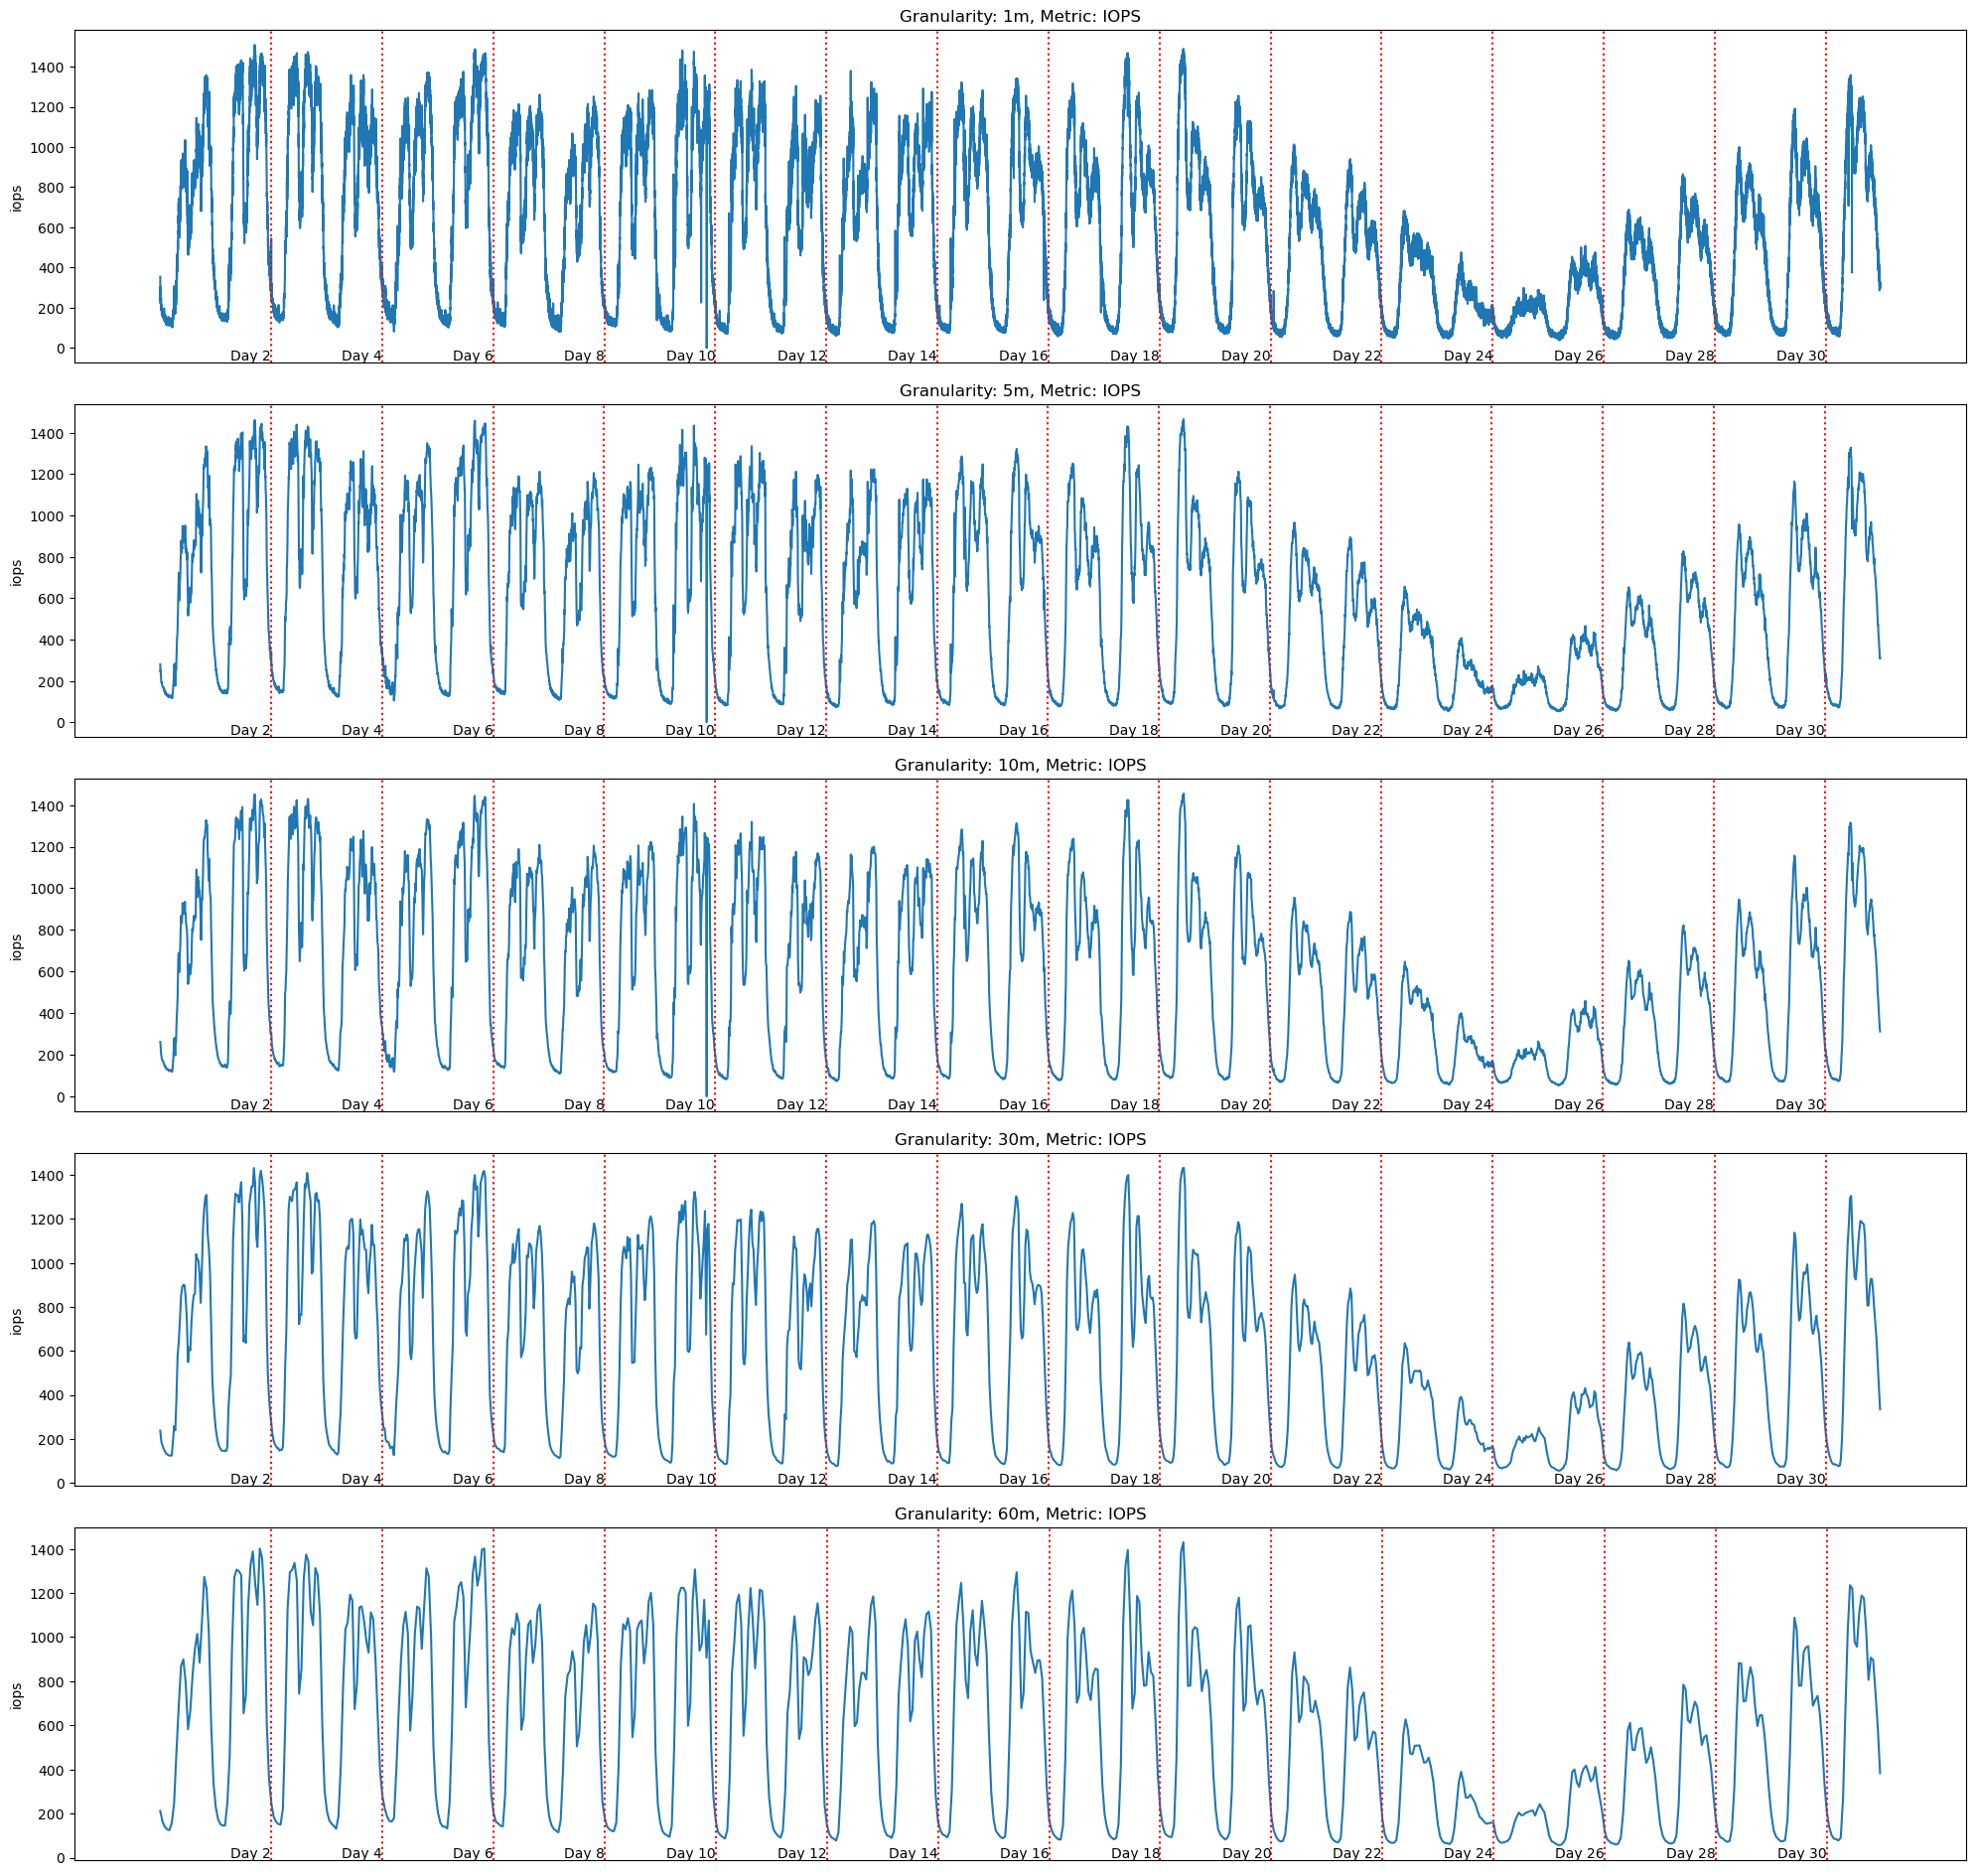

In [91]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

path_to_char = '/home/cc/clio/runs/raw/alibaba/characteristic_selected/79'
time_granularity = ['1m', '5m','10m', '30m', '60m']

fig, axes = plt.subplots(len(time_granularity), 1, figsize=(20, 4 * len(time_granularity)))

for i, time in enumerate(time_granularity):
    for path in Path(path_to_char).rglob(time):
        for path in Path(path).rglob("*.csv"):
            # Read csv
            df = pd.read_csv(path)
            print(len(df))
            
            minute_from_time = re.search(r"(\d+)m", time).group(1)
            # print(len(df))
            # print(minute_from_time)
            # max_day = 9
            # max_windows = max_day * 1440 / int(minute_from_time)
            # # drop indicies > windows
            # df = df[df.index <= max_windows-1]

            # Plot lineplot, iops
            sns.lineplot(data=df, x=df.index, y='iops', ax=axes[i])
            

            # Add vertical ticks every 24 hours
            vertical_ticks = [j for j in range(0, len(df), round(1441 / int(minute_from_time)))]
            for day, tick in enumerate(vertical_ticks, start=1):
                if day == 1 or day % 2 == 0:
                    continue
                axes[i].axvline(x=tick, color='r', linestyle=':')
                axes[i].text(tick, axes[i].get_ylim()[0], f'Day {day-1}', color='black', ha='right', va='bottom', fontsize=10)
        

            # # make last vertical line, day 9
            # last_day = len(vertical_ticks)
            # max_index = len(df)
            # axes[i].axvline(x=max_index, color='r', linestyle=':')
            # axes[i].text(max_index, axes[i].get_ylim()[0], f'Day {last_day}', color='black', ha='right', va='bottom', fontsize=10)
            # Plot vertical ticks, red, stripped/dotted
            # for tick in vertical_ticks:
            #     if tick == 0 or tick % 2 == 0:
            #         continue
            #     axes[i].axvline(x=tick, color='r', linestyle=':')

            # Title minute granularity
            device_id = re.search(r"characteristic/(\d+)", str(path)).group(1)
            axes[i].set_title(f"Granularity: {time}, Metric: IOPS")

            # Only set the X-axis label for the last subplot
            # if i < len(time_granularity) - 1:
            axes[i].set_xlabel('')
            axes[i].set_xticklabels([])
            # else:
            #     axes[i].set_xlabel('Chunk')
            #     axes[i].set_xticklabels([])
            # Remove x ticks
            axes[i].set_xticks([])
            axes[i].set_xticklabels([])
            

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


4464 offset_avg


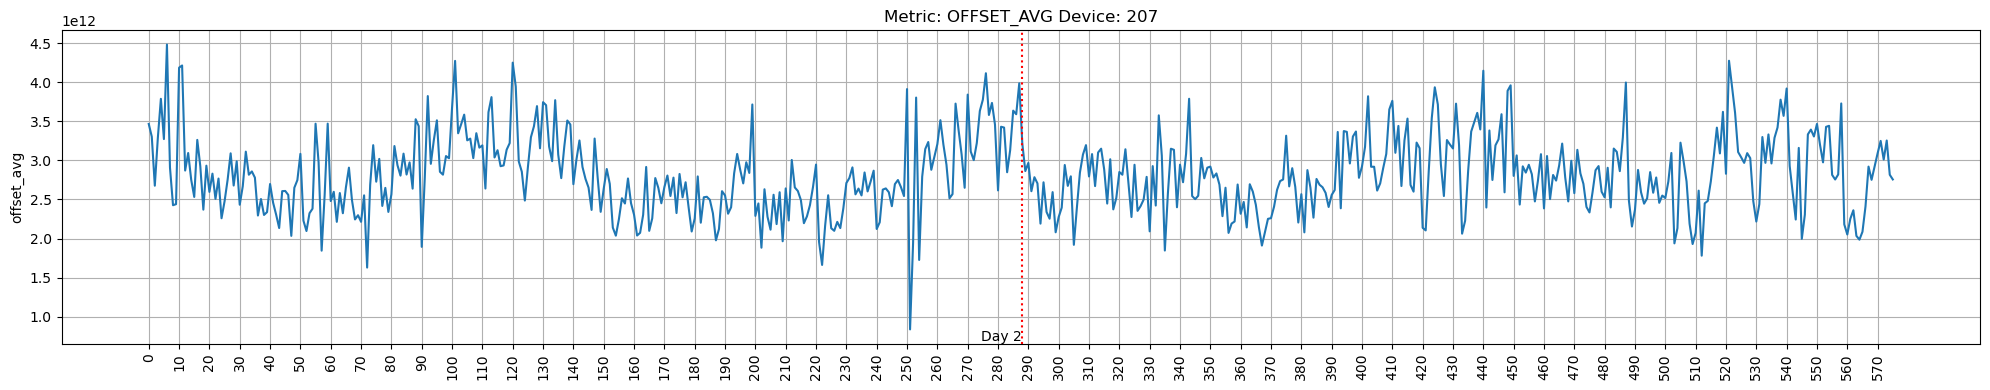

4464 offset_avg


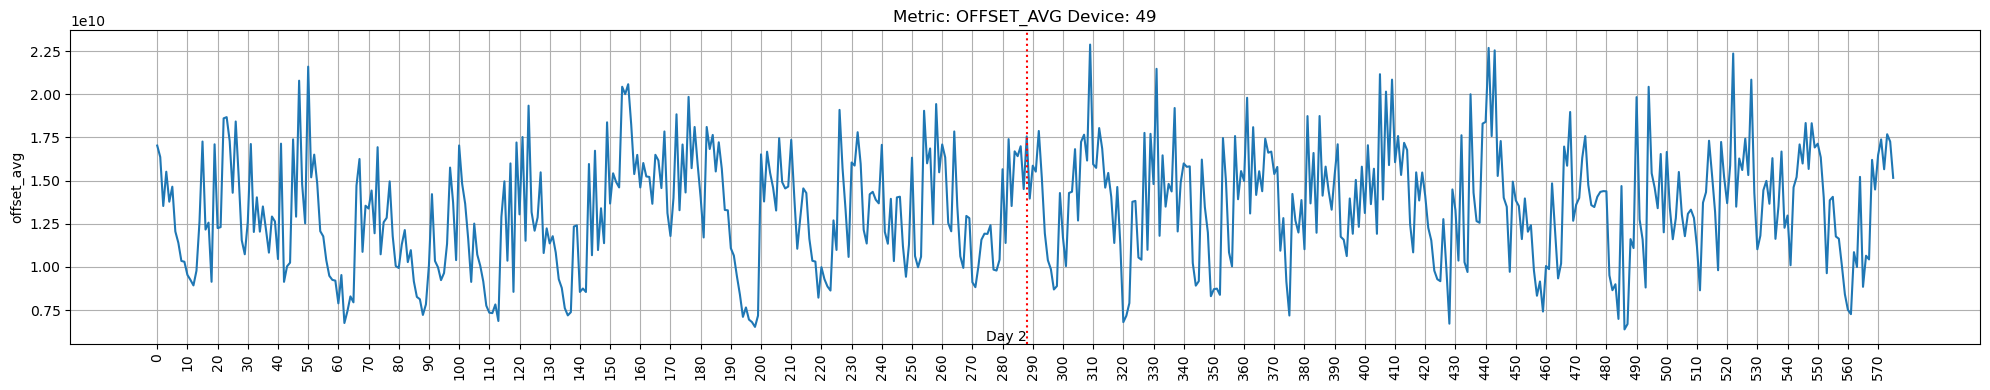

/tmp/ipykernel_3496559/3140347694.py:22: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


2418 offset_avg


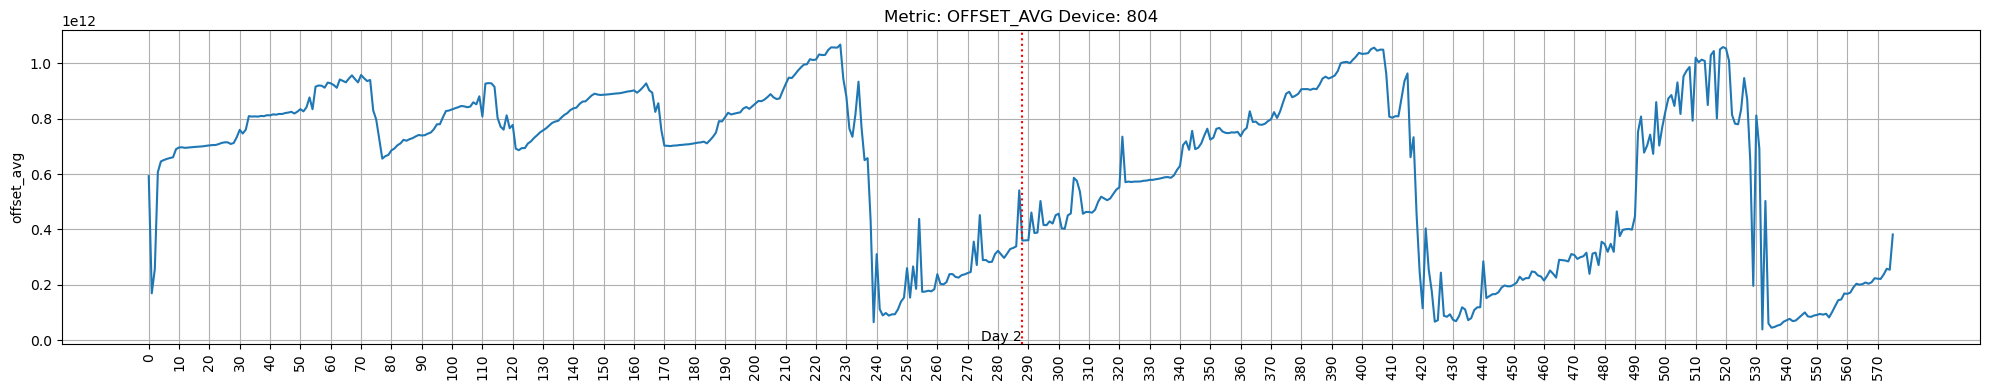

4121 offset_avg


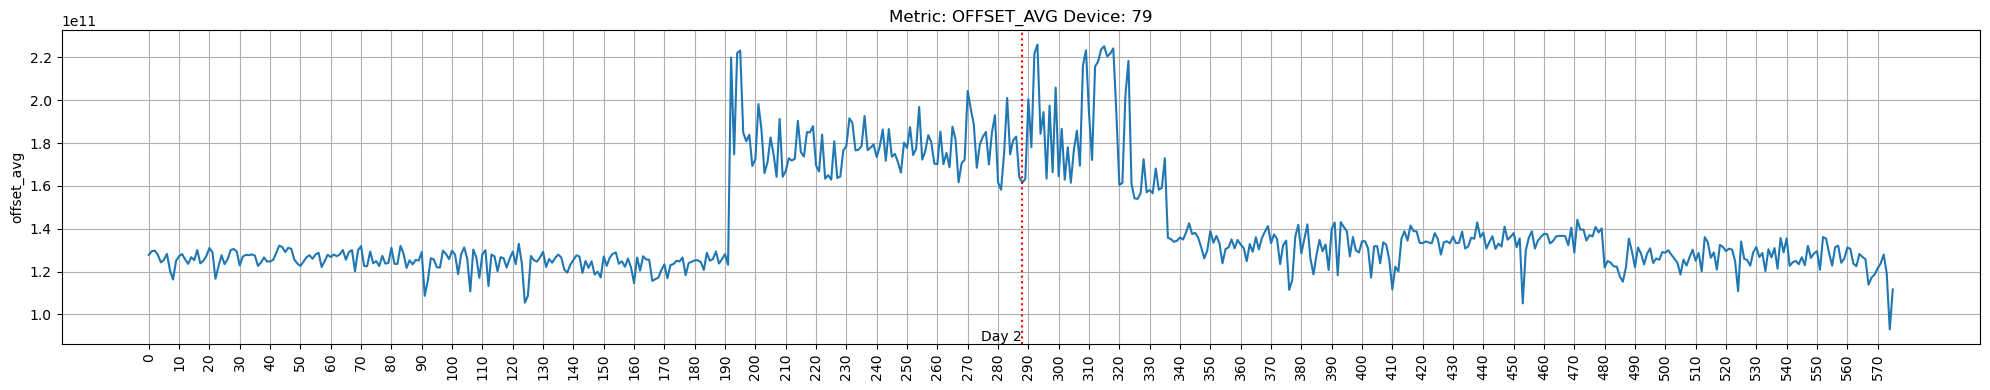

In [7]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

path_to_char = '/home/cc/clio/runs/raw/alibaba/characteristic_selected'
metric_to_plot = [
                # 'iops' 
                # 'iat_avg' 
                # 'size_avg', 
                'offset_avg', 
                # 'read_ratio', 'write_ratio'
                #   'read_count',
                #   'write_count'
                  ]
# rglob for files with 10m
for path_10m in Path(path_to_char).rglob("10m"):
    for path in Path(path_10m).rglob("*.csv"):
        for metric in metric_to_plot:
            plt.figure(figsize=(20, 4))
            df = pd.read_csv(path)
            print(len(df), metric)
            minute_from_time = re.search(r"(\d+)m", str(path)).group(1)
            
            max_day = 4
            max_windows = max_day * 1440 / int(minute_from_time)
            df = df[df.index <= max_windows-1]
            sns.lineplot(data=df, x=df.index, y=metric)
            
            # Add vertical ticks every 24 hours
            vertical_ticks = [j for j in range(0, len(df), round(1440 / int(minute_from_time)))]
            for day, tick in enumerate(vertical_ticks, start=1):
                if day == 1 or day % 2 == 0:
                    continue
                plt.axvline(x=tick, color='r', linestyle=':')
                plt.text(tick, plt.ylim()[0], f'Day {day-1}', color='black', ha='right', va='bottom', fontsize=10)
        
            # Title minute granularity
            device_id = re.search(r"selected/(\d+)", str(path)).group(1)
            plt.title(f"Metric: {metric.upper()} Device: {device_id}")
            plt.xlabel('')
            # plt.xticks([])
            plt.xticks(range(min(df.index), max(df.index) + 1, 10))
            # make the x ticks vertical
            plt.xticks(rotation=90)
            # have plt grids
            plt.grid()
            
            # Adjust layout
            plt.tight_layout()
            plt.show()

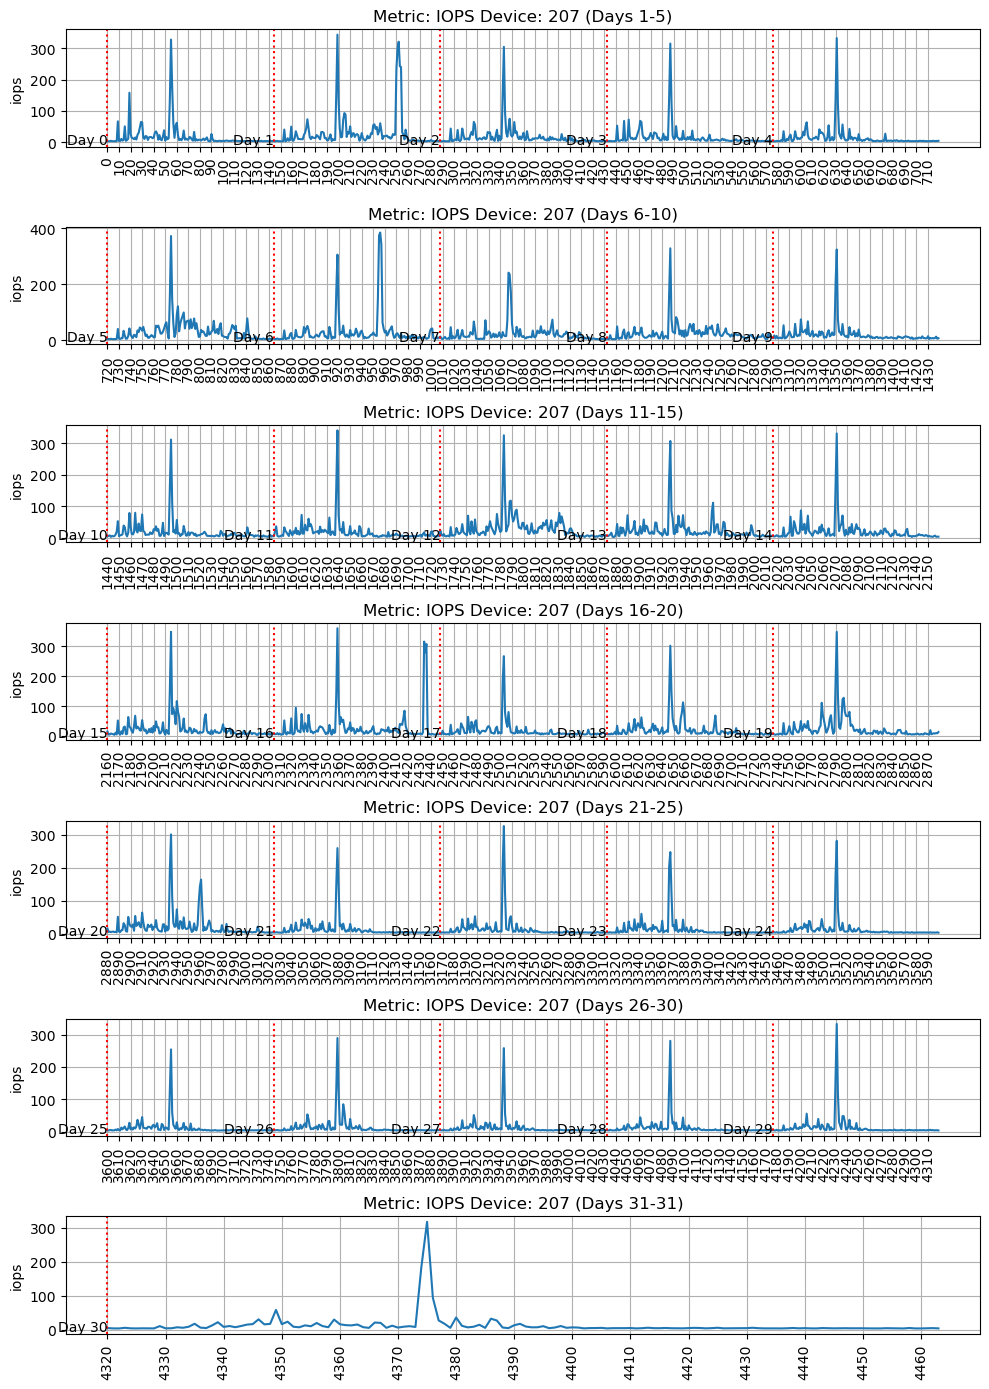

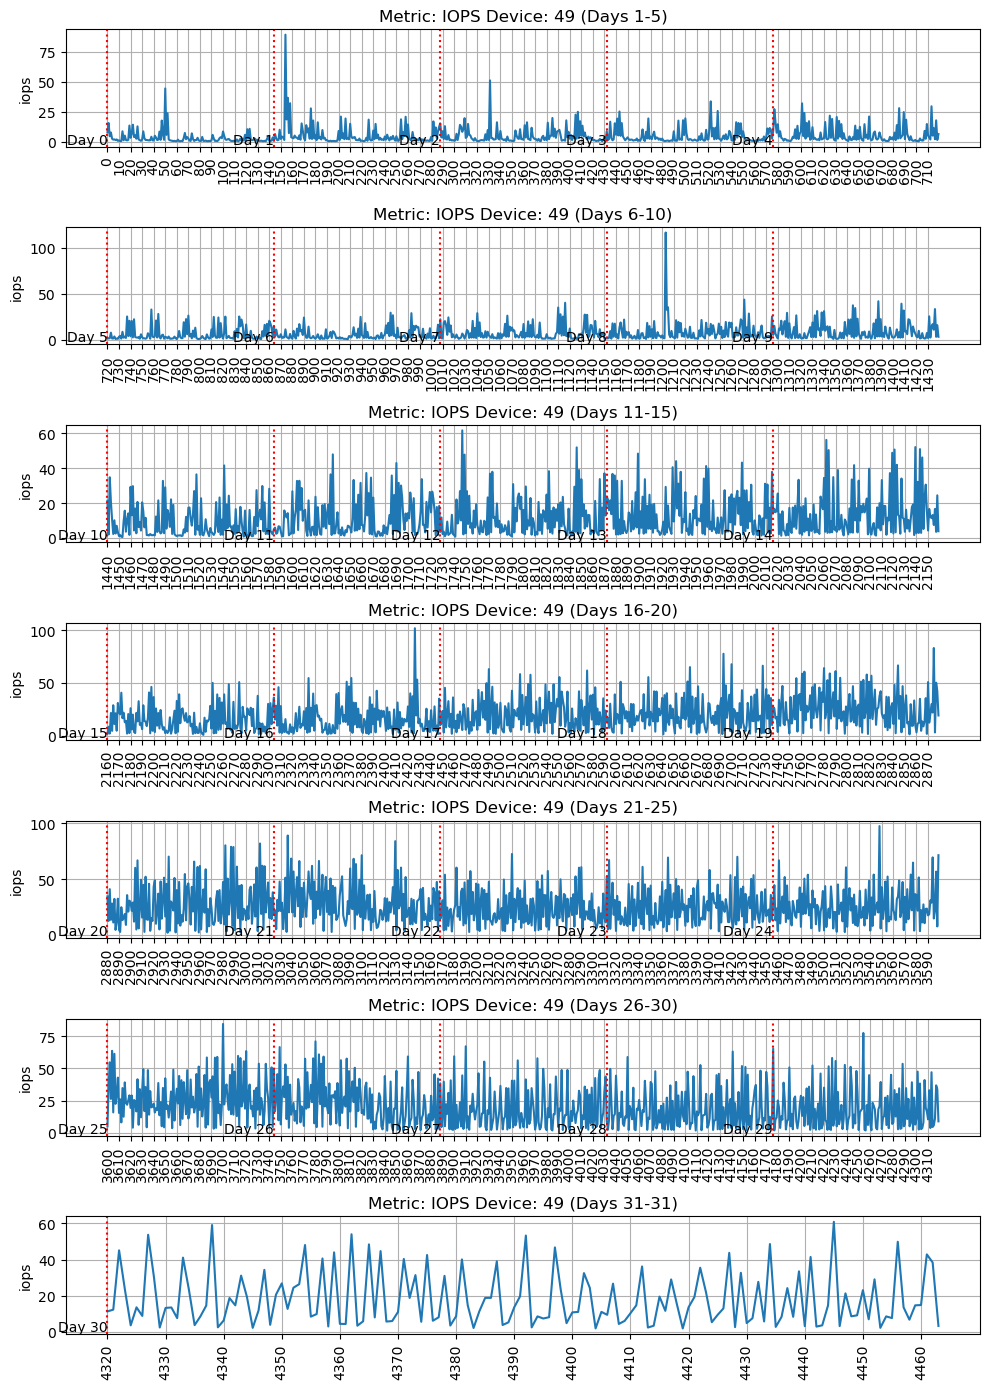

/tmp/ipykernel_3637877/2229302018.py:161: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


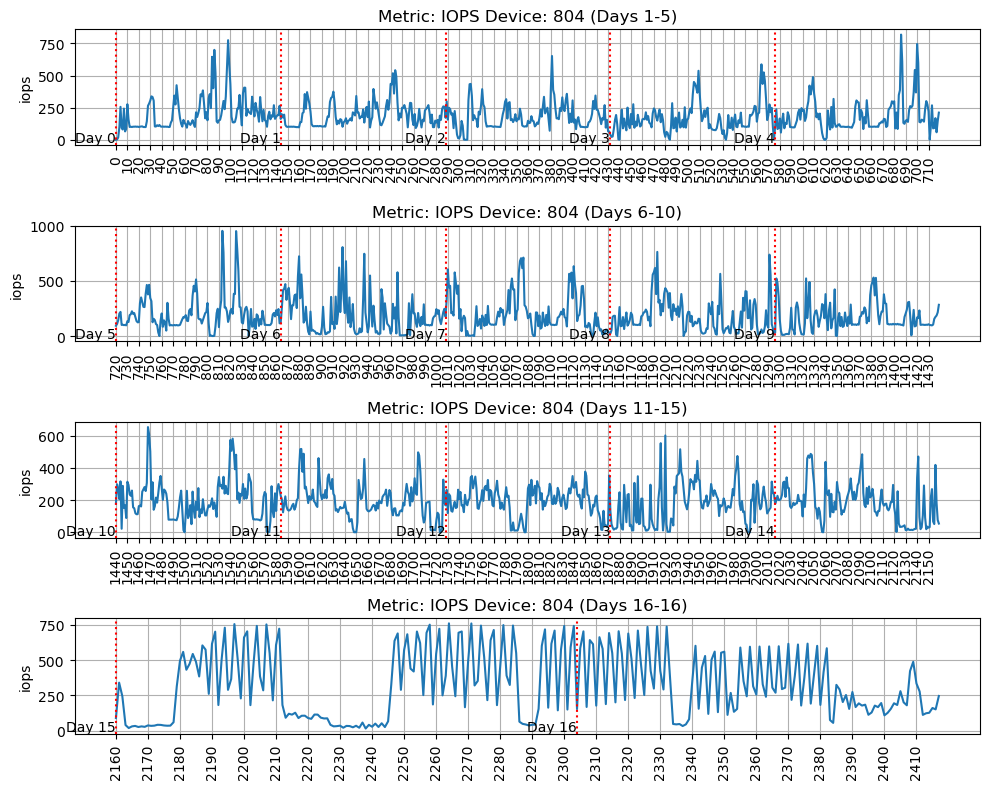

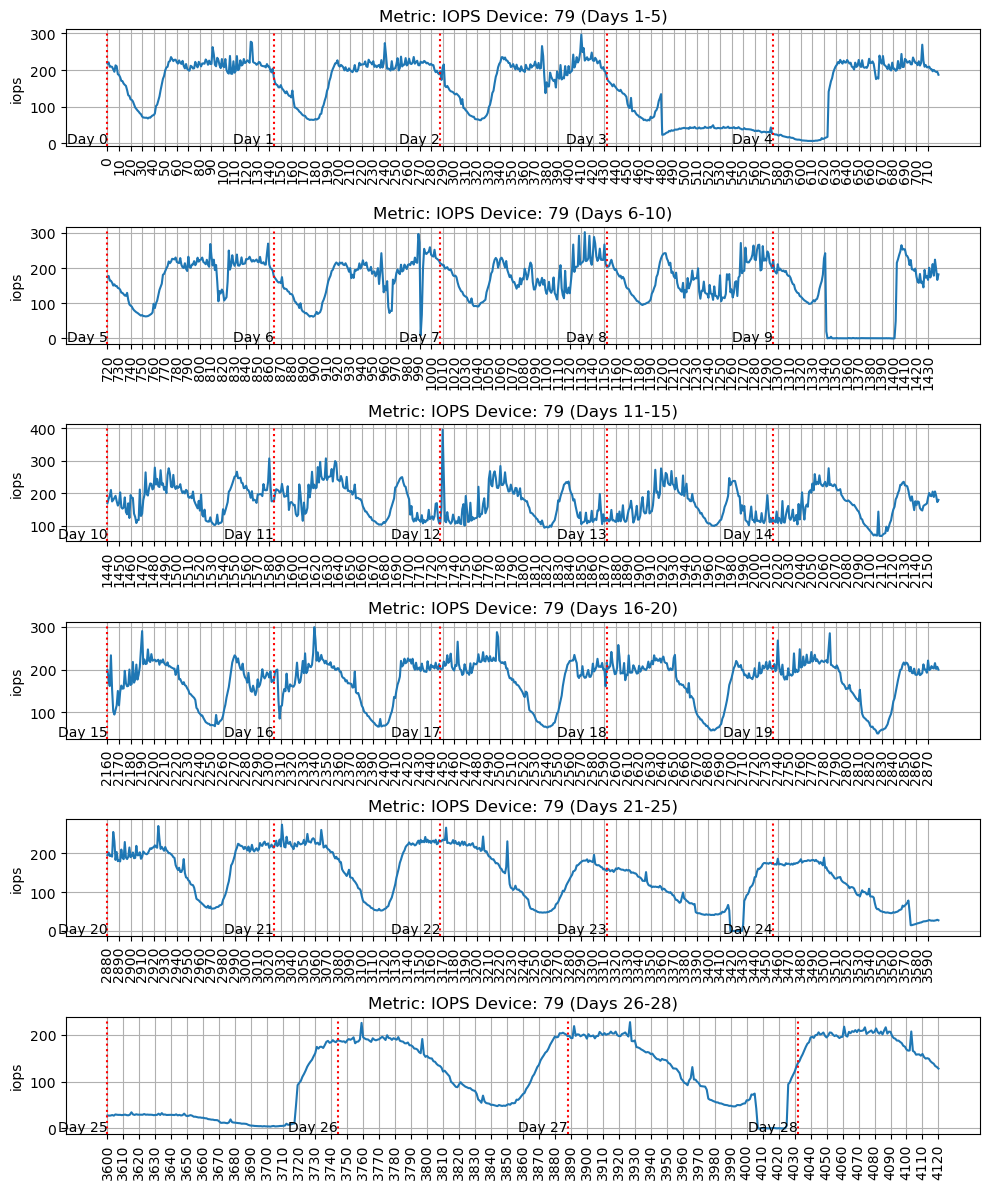

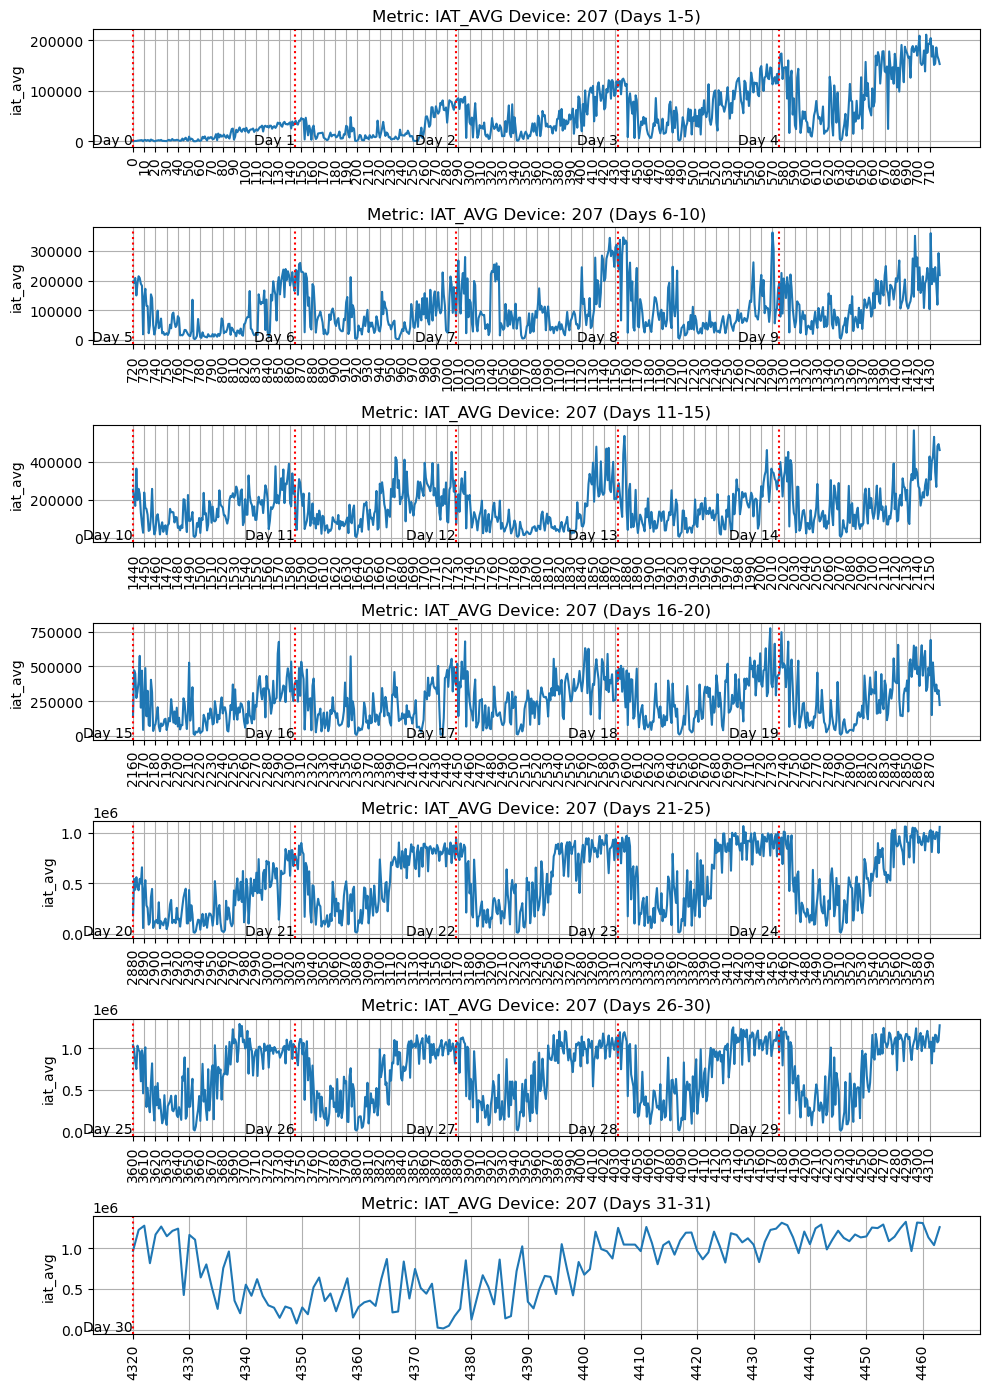

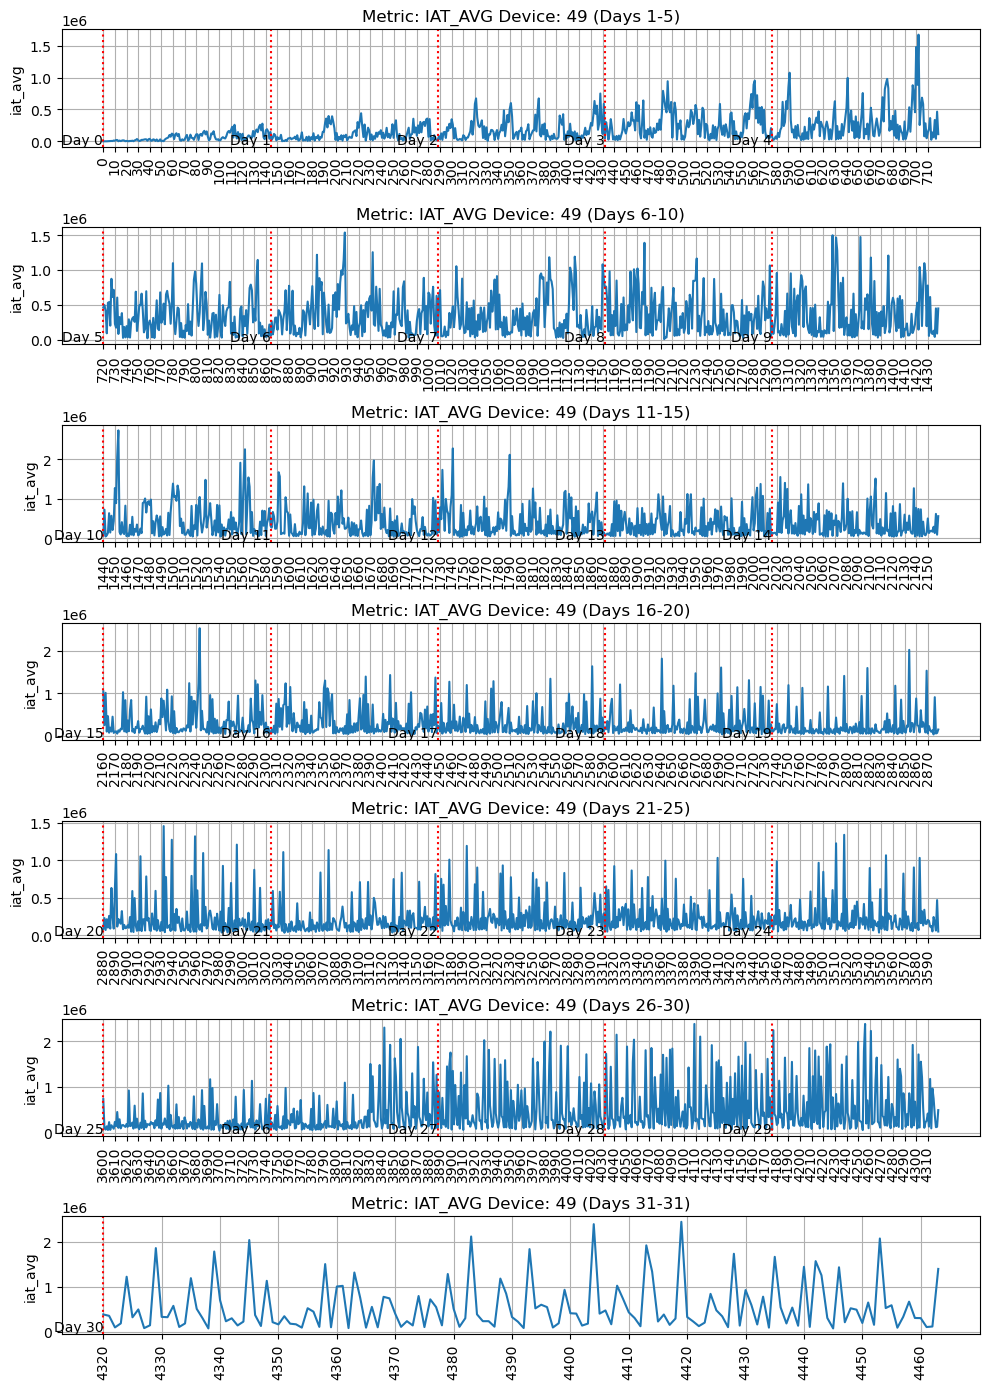

/tmp/ipykernel_3637877/2229302018.py:161: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


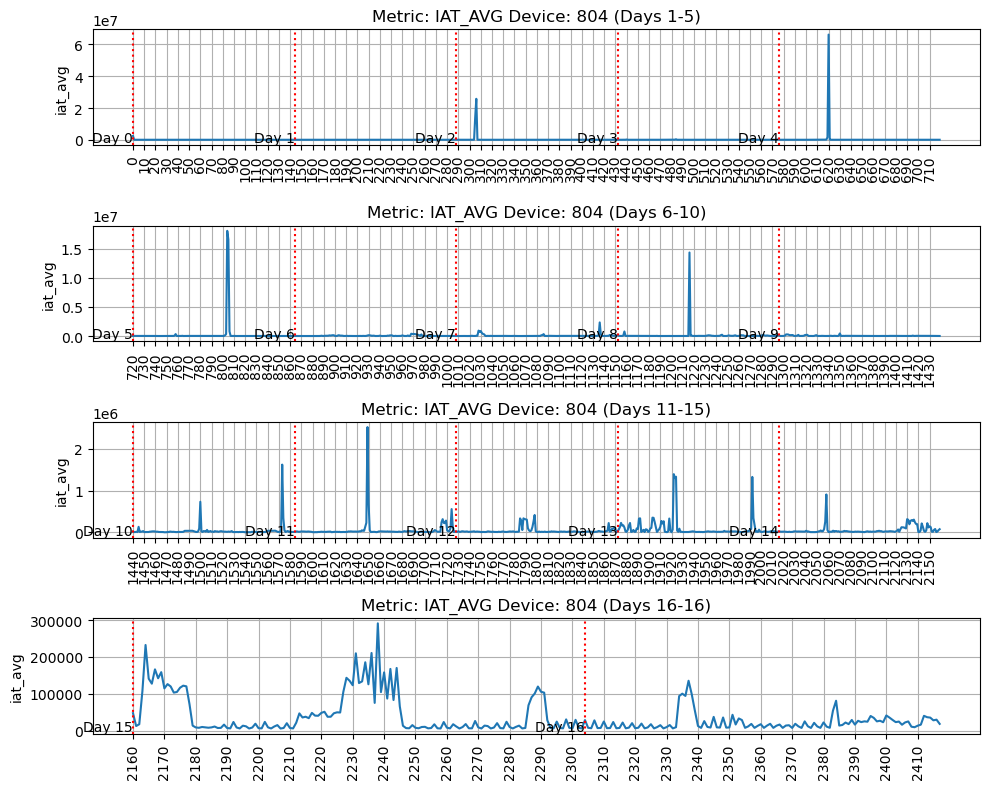

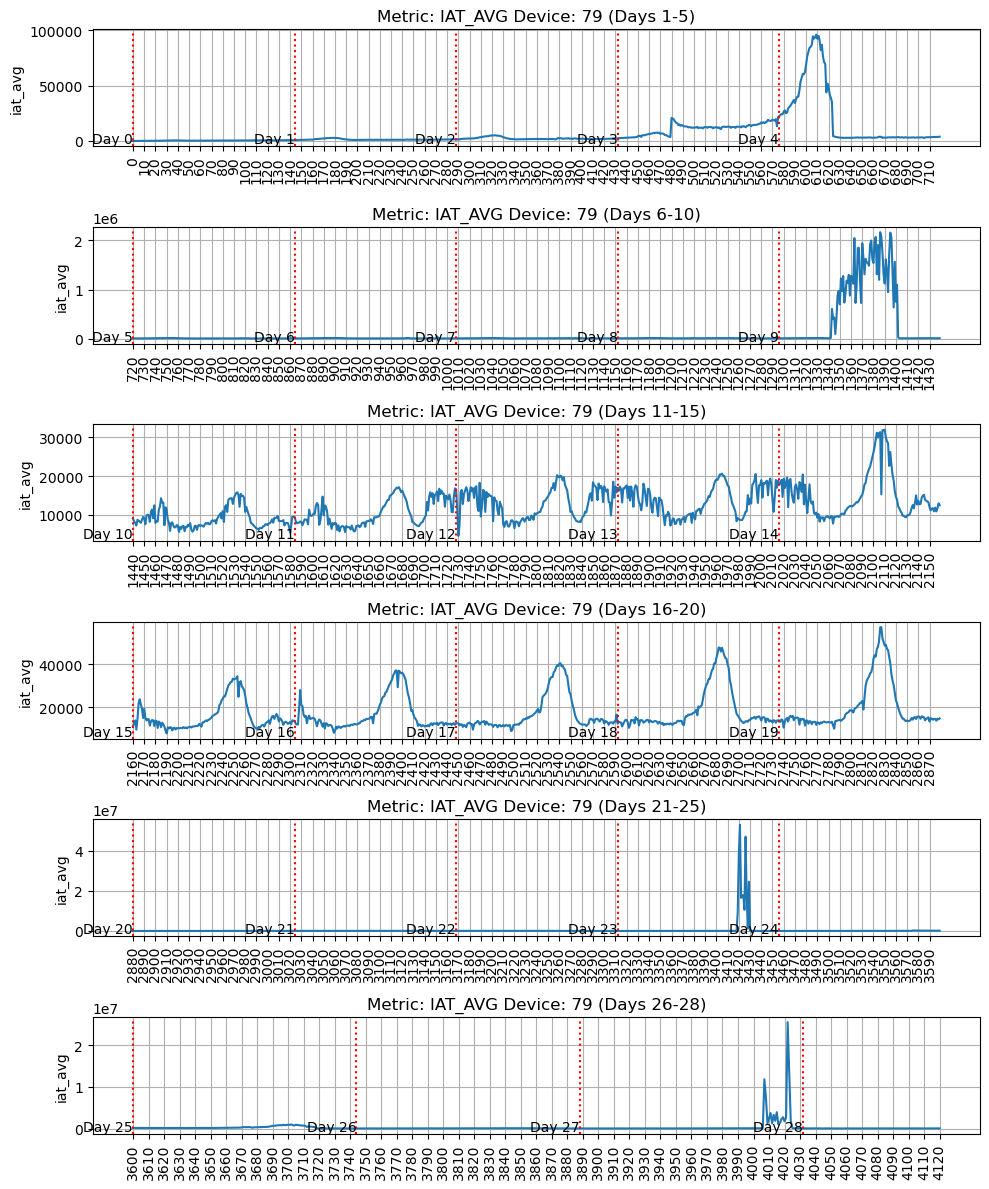

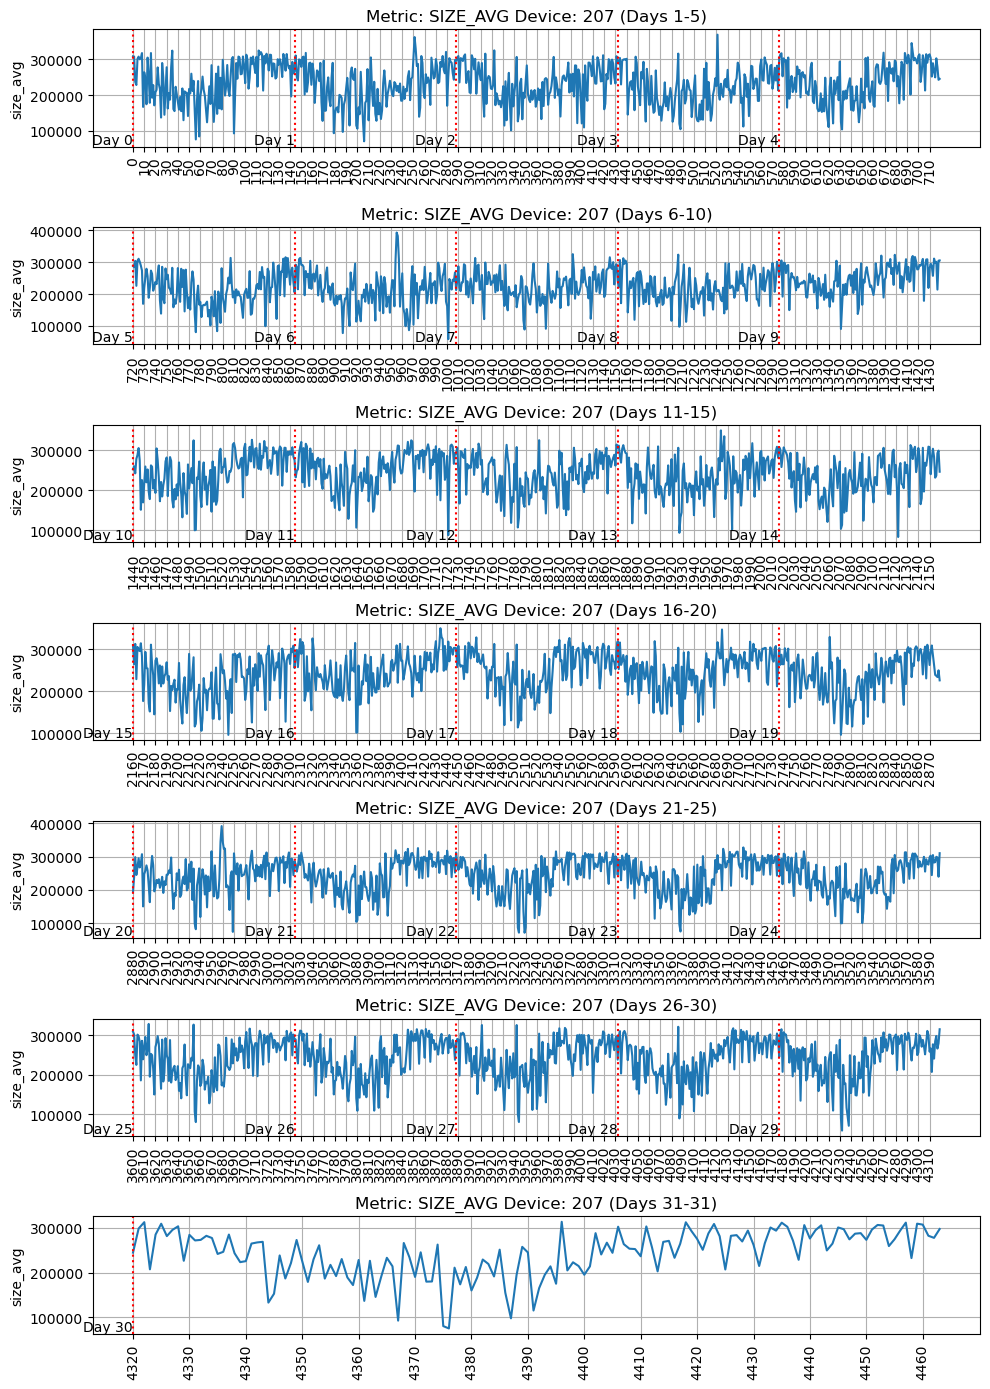

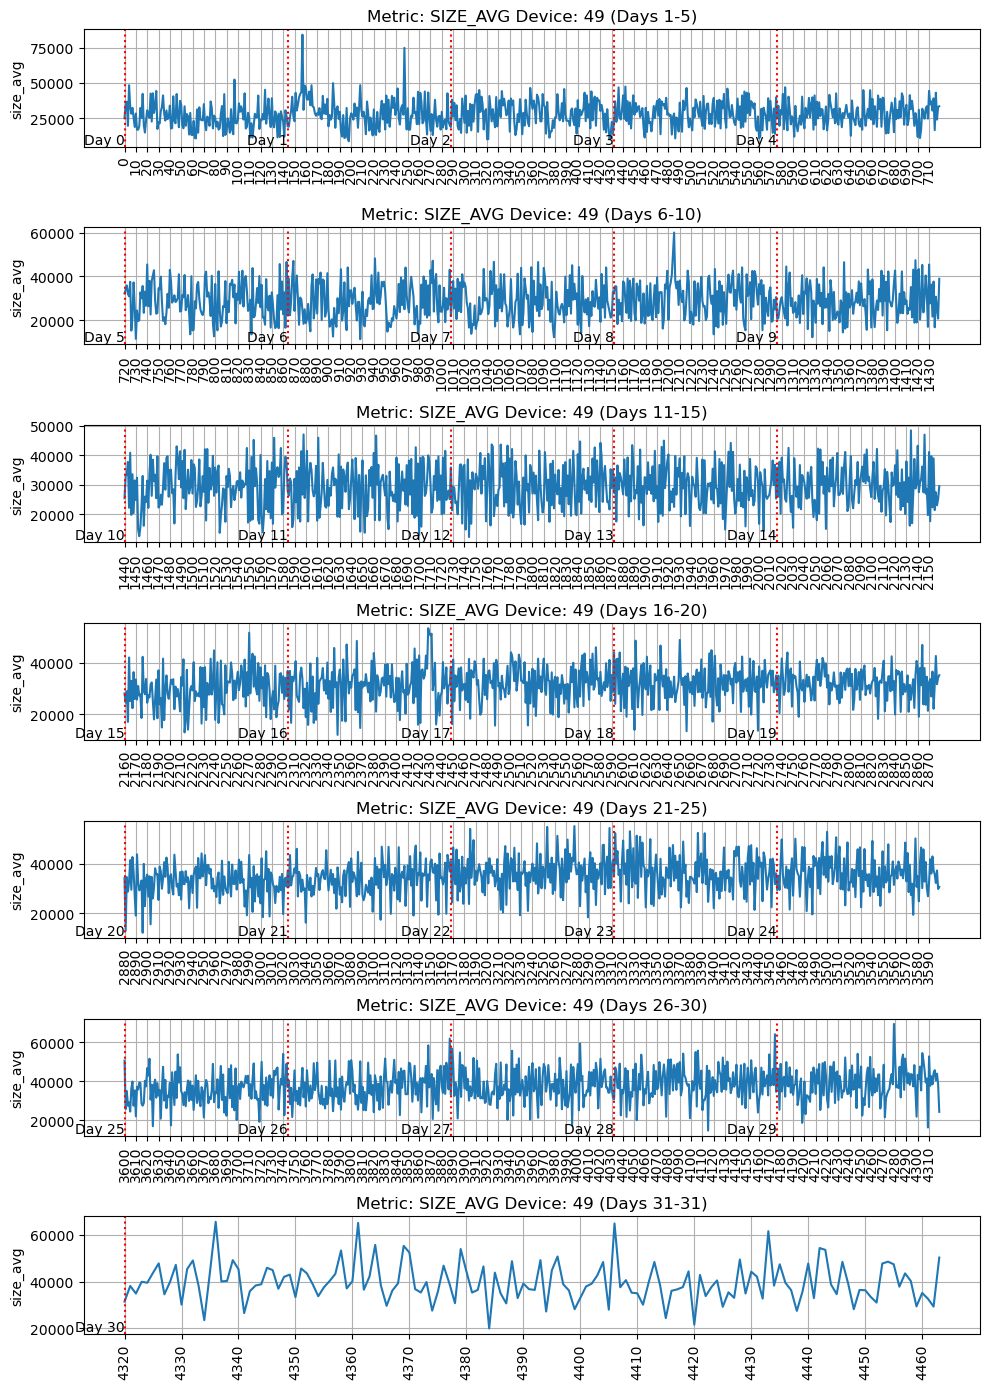

/tmp/ipykernel_3637877/2229302018.py:161: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


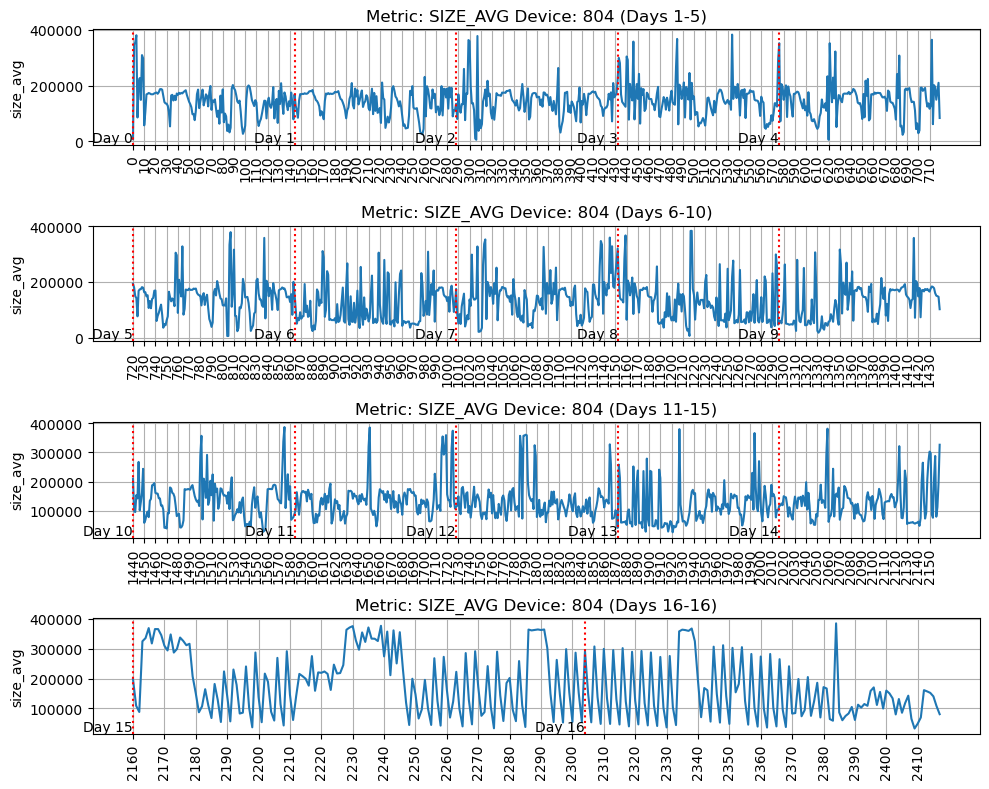

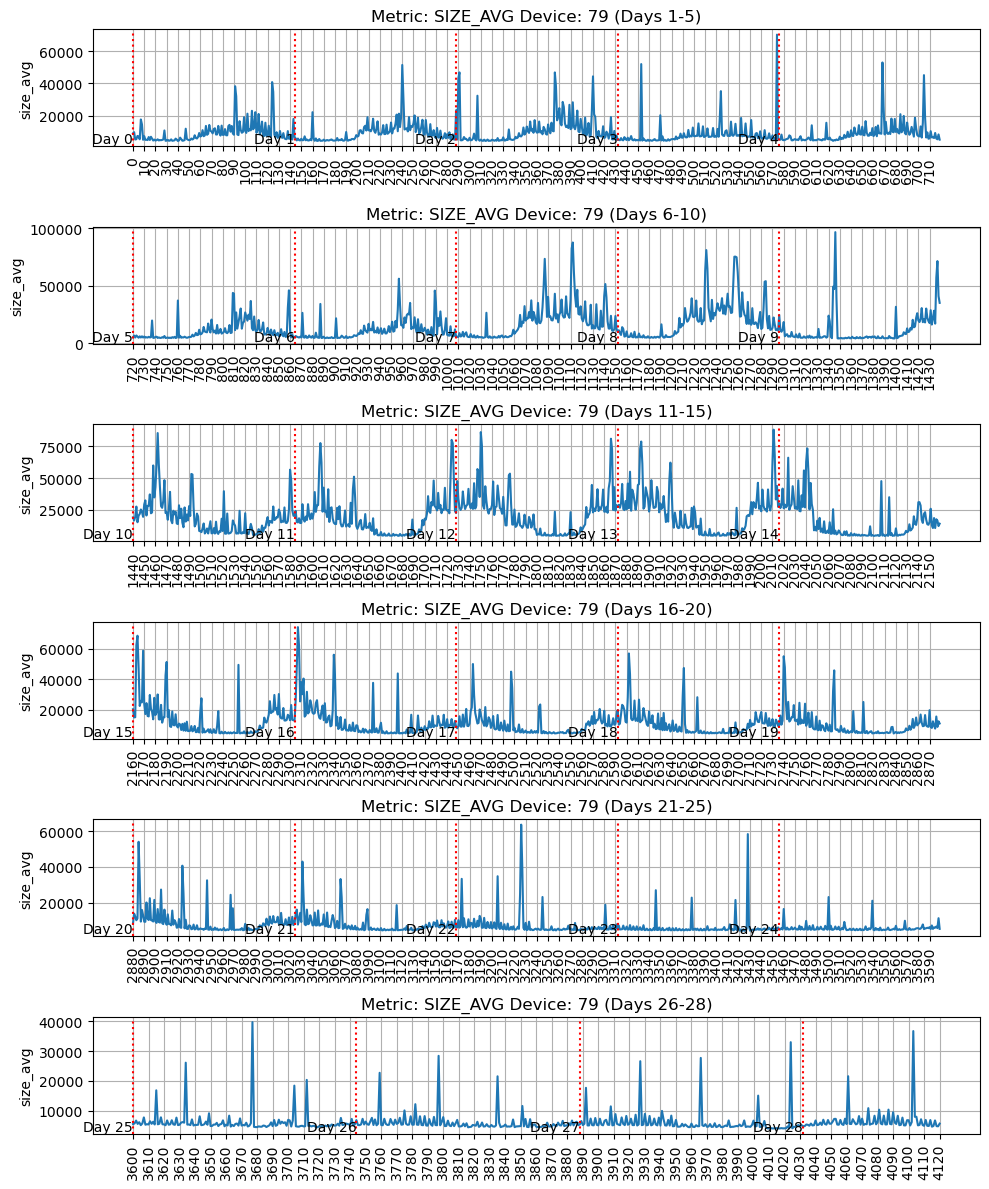

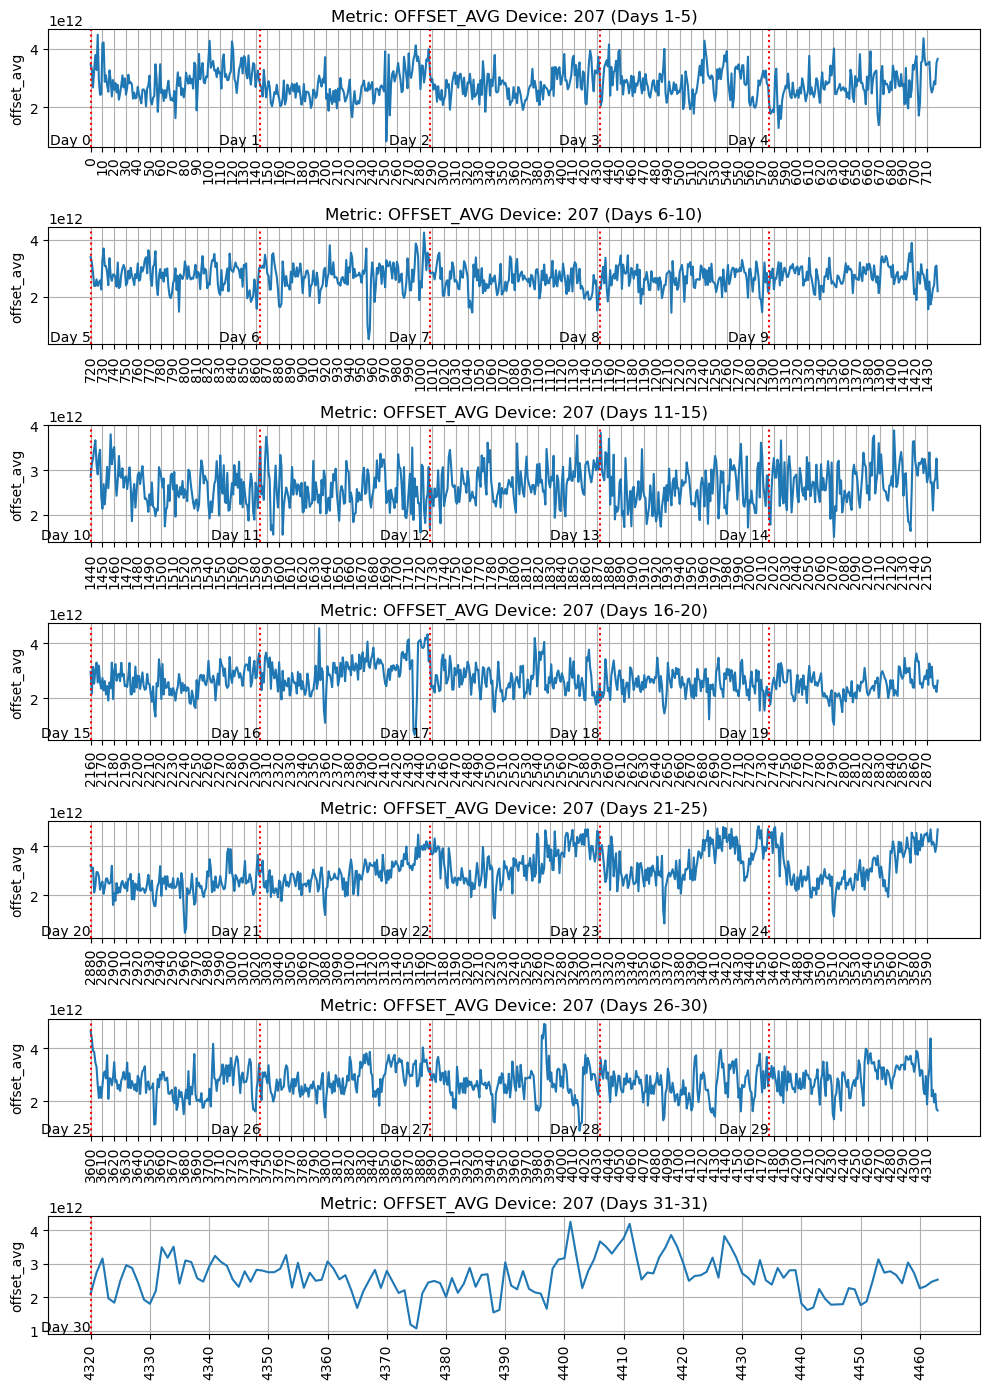

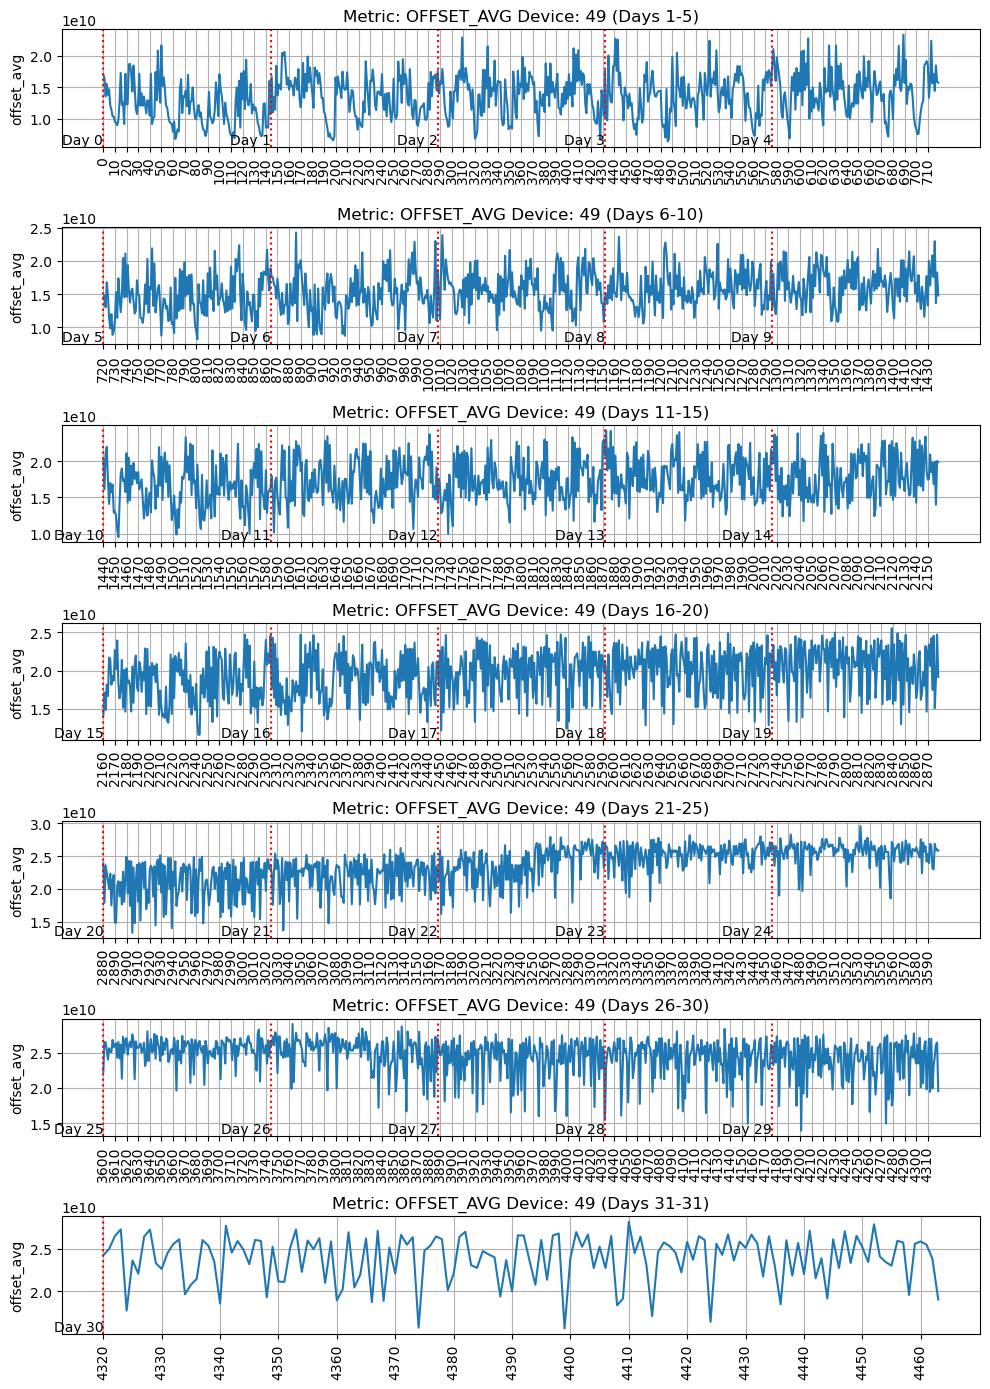

/tmp/ipykernel_3637877/2229302018.py:161: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


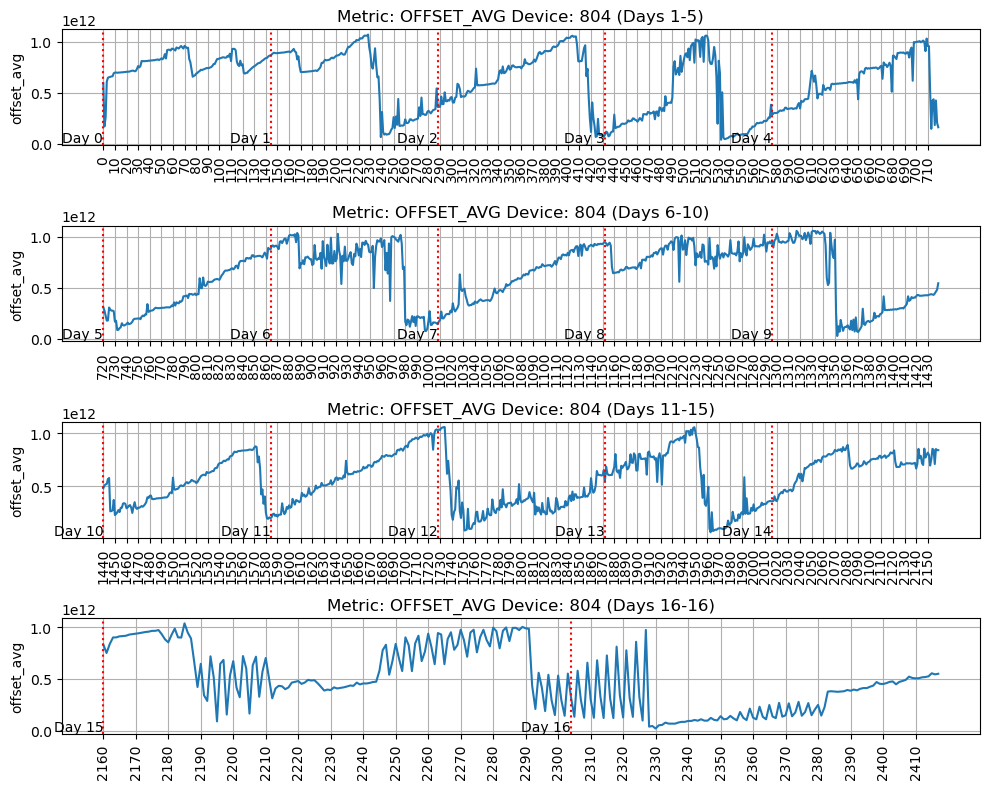

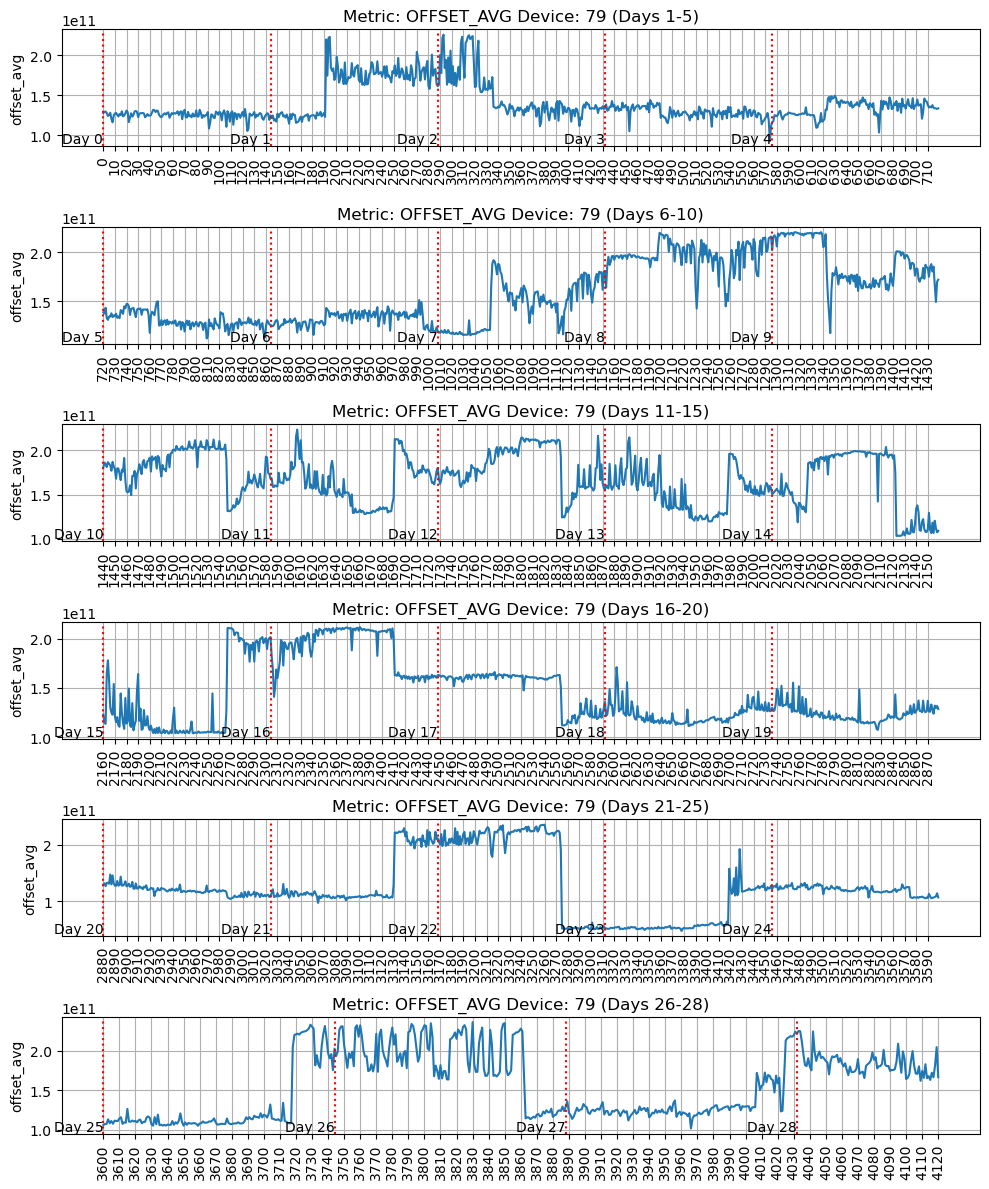

In [2]:
from pathlib import Path
import pandas as pd
import re
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from openpyxl.utils import get_column_letter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image as PILImage
import io

def plot_device_metric(df, metric, minute_from_time, device_id, days_per_subplot=5, max_days=30):
    """
    Plot the specified metric over time for a device and return the compressed plot image.
    """
    total_minutes = len(df) * int(minute_from_time)
    total_days = total_minutes / 1440  # Calculate the total number of days available
    num_subplots = int(total_days / days_per_subplot) + (1 if total_days % days_per_subplot != 0 else 0)
    
    # Create a large figure with subplots
    fig, axs = plt.subplots(num_subplots, 1, figsize=(10, 2 * num_subplots))
    if num_subplots == 1:
        axs = [axs]  # Ensure axs is iterable if there's only one subplot
    
    for i in range(num_subplots):
        start_index = i * days_per_subplot * 1440 // int(minute_from_time)
        end_index = start_index + days_per_subplot * 1440 // int(minute_from_time)
        
        ax = axs[i]
        sns.lineplot(data=df.iloc[start_index:end_index], x=df.index[start_index:end_index], y=metric, ax=ax)
        
        # Add vertical ticks every 24 hours within each subplot
        vertical_ticks = [j for j in range(start_index, min(end_index, len(df)), round(1440 / int(minute_from_time)))]
        for day, tick in enumerate(vertical_ticks, start=1):
            ax.axvline(x=tick, color='r', linestyle=':')
            ax.text(tick, ax.get_ylim()[0], f'Day {day + i * days_per_subplot - 1}', 
                    color='black', ha='right', va='bottom', fontsize=10)
        
        ax.set_title(f"Metric: {metric.upper()} Device: {device_id} (Days {i*days_per_subplot+1}-{min((i+1)*days_per_subplot, int(total_days))})")
        ax.set_xlabel('')
        ax.set_xticks(range(min(df.index[start_index:end_index]), max(df.index[start_index:end_index]) + 1, 10))
        ax.set_xticklabels(ax.get_xticks(), rotation=90)
        ax.grid()

    plt.tight_layout()

    # Save plot to a bytes buffer and compress
    buffer = io.BytesIO()
    fig.savefig(buffer, format='png', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    
    # Compress image
    buffer.seek(0)
    img = PILImage.open(buffer)
    
    
    # Save the compressed image to another buffer
    compressed_buffer = io.BytesIO()
    rgb_im = img.convert('RGB')
    rgb_im.save(compressed_buffer, format='JPEG', optimize=True, quality=50)
    
    return compressed_buffer

def save_plot_to_excel(ws, row, plot_buffer, device_id):
    """
    Save the plot image and device_id to a specific row in the Excel worksheet.
    """
    ws.merge_cells(f"A{row}:A{row+14}")  # Merge 15 rows for the device_id cell
    ws.merge_cells(f"B{row}:B{row+14}")  # Merge 15 rows for the image cell
    ws[f"A{row}"] = device_id
    
    img = Image(plot_buffer)
    img.width = img.width // 2  # Adjust width of the image
    img.height = img.height // 2  # Adjust height of the image
    ws.add_image(img, f"B{row}")
    
    # Adjust row height to fit the image and merge cells
    for i in range(15):
        ws.row_dimensions[row + i].height = img.height / 15
    ws.column_dimensions['B'].width = img.width * 0.15

def main():
    path_to_char = '/home/cc/clio/runs/raw/alibaba/characteristic_selected'
    char_to_merge = '/home/cc/clio/nix-utils/alibaba_device_rw-device_counts.csv'
    df_to_merge =  pd.read_csv(char_to_merge)
    metric_to_plot = [
                'iops', 
                'iat_avg', 
                'size_avg', 
                'offset_avg', 
                # 'read_ratio', 
                # 'write_ratio', 
                # 'read_count', 
                # 'write_count'
                ]
    
    columns_to_merge = [
        'num_io',
        'read_count',
        'read_percentage',
        'write_count',
        'write_percentage',
        'avg_offset',
        'avg_size',	
        'ts_max',
        'ts_min',	
        'duration'		
    ]
    
    # Create a single workbook for all metrics
    workbook = Workbook()
    
    # Remove the default sheet
    default_sheet = workbook.active
    workbook.remove(default_sheet)

    for metric in metric_to_plot:
        # Create a new sheet for each metric
        ws = workbook.create_sheet(title=metric)
        
        # Add headers
        ws["A1"] = "Device ID"
        ws.merge_cells("A1:A2")
        ws["B1"] = "Line Graph"
        ws.merge_cells("B1:B2")
        
        ws["C1"] = "Sudden"
        ws.merge_cells("C1:D1")
        ws["C2"] = "X Range"
        ws["D2"] = "Y Range"
        
        ws["E1"] = "Gradual"
        ws.merge_cells("E1:F1")
        ws["E2"] = "X Range"
        ws["F2"] = "Y Range"
        
        ws["G1"] = "Incremental"
        ws.merge_cells("G1:H1")
        ws["G2"] = "X Range"
        ws["H2"] = "Y Range"
        
        ws["I1"] = "Recurring"
        ws.merge_cells("I1:J1")
        ws["I2"] = "X Range"
        ws["J2"] = "Y Range"
        
        # Add columns to merge
        for i, column in enumerate(columns_to_merge):
            ws.cell(row=1, column=11+i, value=column)
            
        
        
        for col in range(3, 11):
            ws.column_dimensions[get_column_letter(col)].width = 15    
        
        row = 3 # Start from the second row to avoid header
        
        for path_10m in Path(path_to_char).rglob("10m"):
            for path in Path(path_10m).rglob("*.csv"):
                df = pd.read_csv(path)
                minute_from_time = re.search(r"(\d+)m", str(path)).group(1)
                device_id = re.search(r"selected/(\d+)", str(path)).group(1)
                
                # Generate the plot and get the compressed image buffer
                plot_buffer = plot_device_metric(df, metric, minute_from_time, device_id)
                
                # Save the plot and device_id to the current row in the sheet
                save_plot_to_excel(ws, row, plot_buffer, device_id)
                # Merge the columns
                df_device = df_to_merge[df_to_merge['device_id'] == int(device_id)]
                for i, column in enumerate(columns_to_merge):
                    ws.cell(row=row, column=11+i, value=df_device[column].values[0])
                row += 15  # Move to the next set of rows for the next device
    
    # # Save the workbook
    # workbook.save("metric_plots.xlsx")

if __name__ == "__main__":
    main()


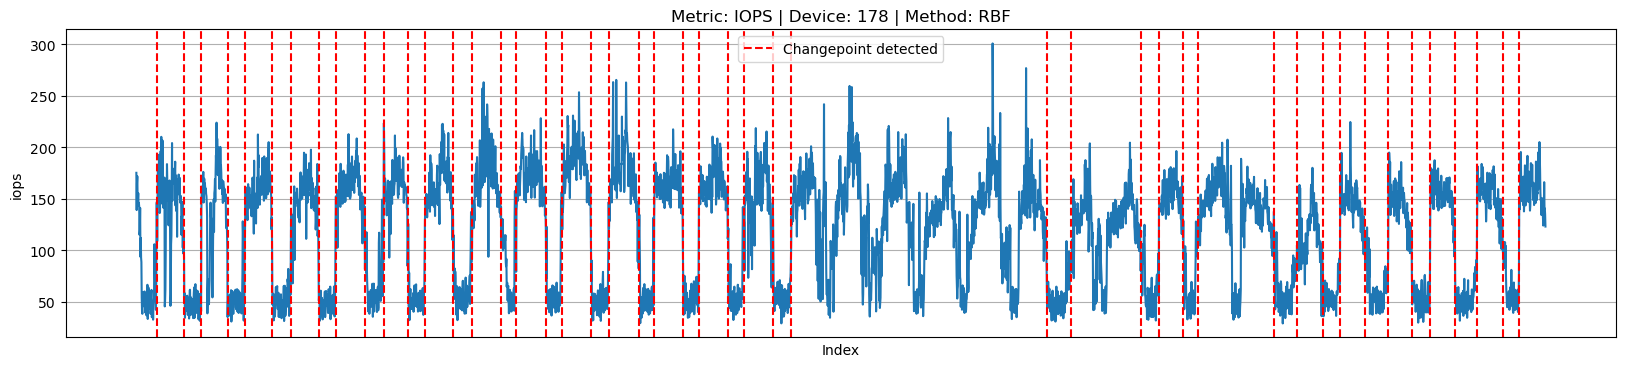

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


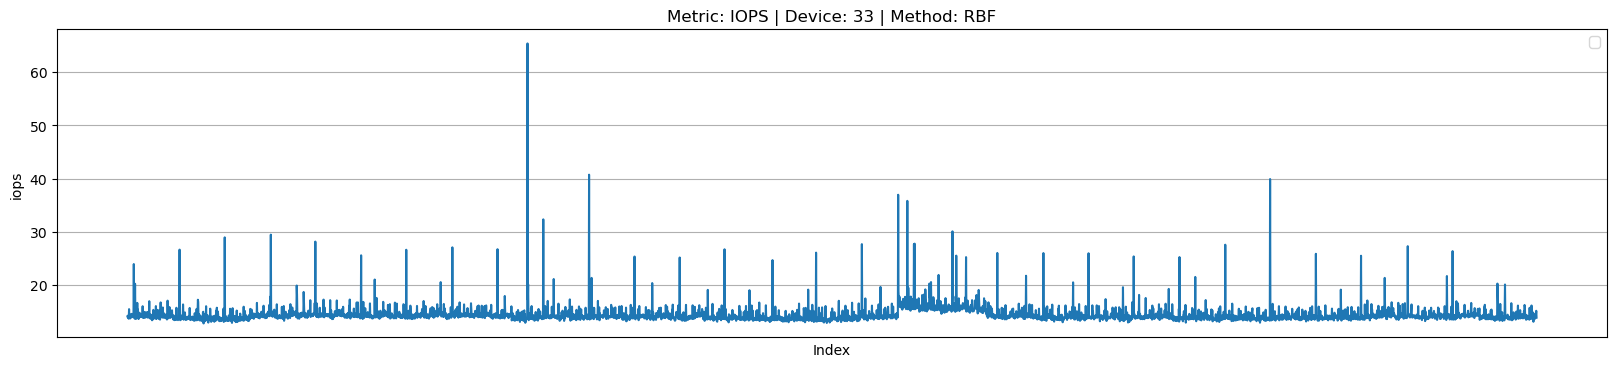

/tmp/ipykernel_3637877/699604834.py:93: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


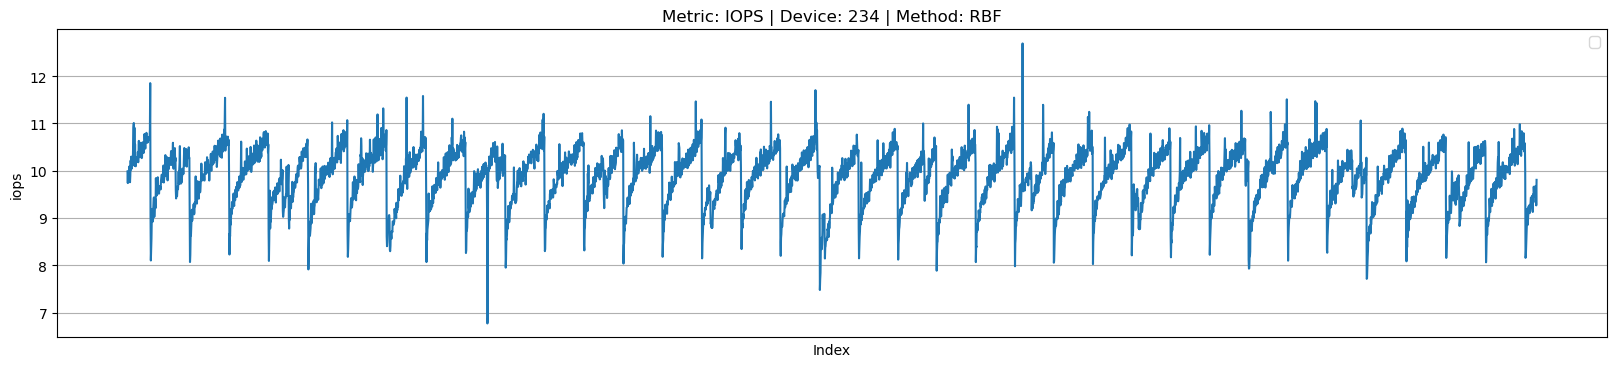

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


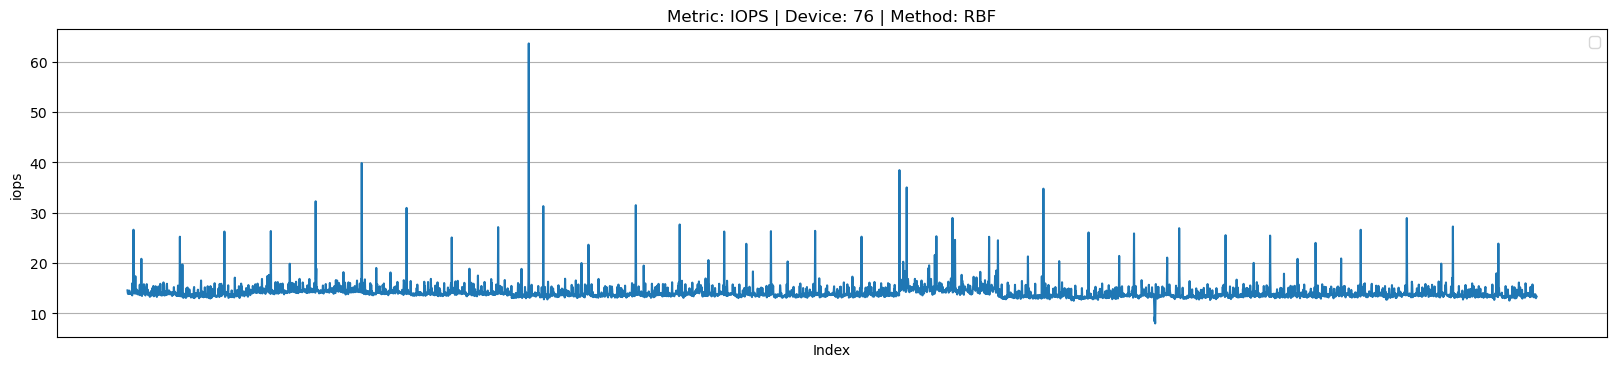

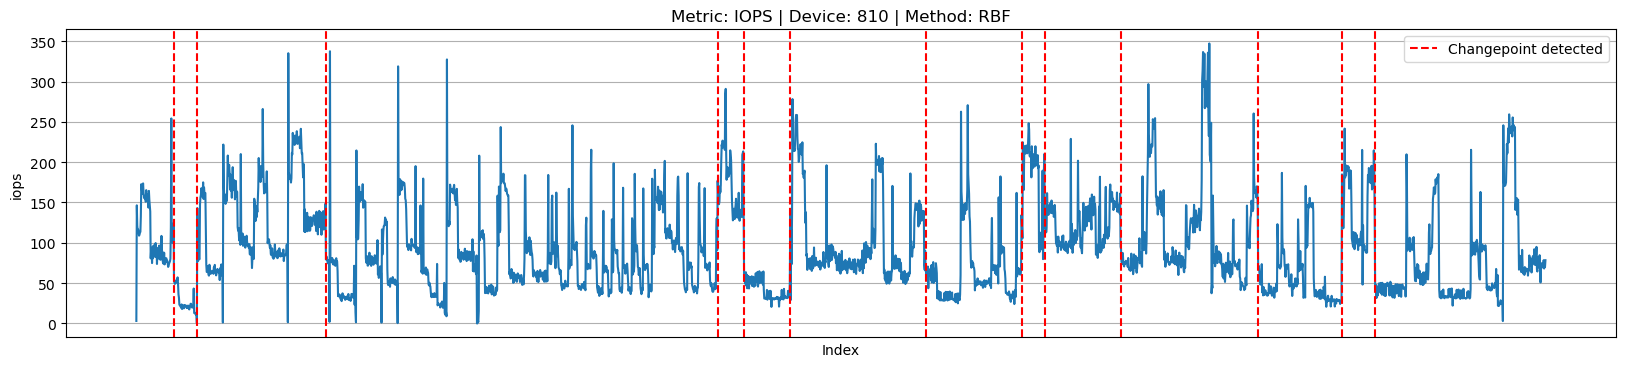

/tmp/ipykernel_3637877/699604834.py:93: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


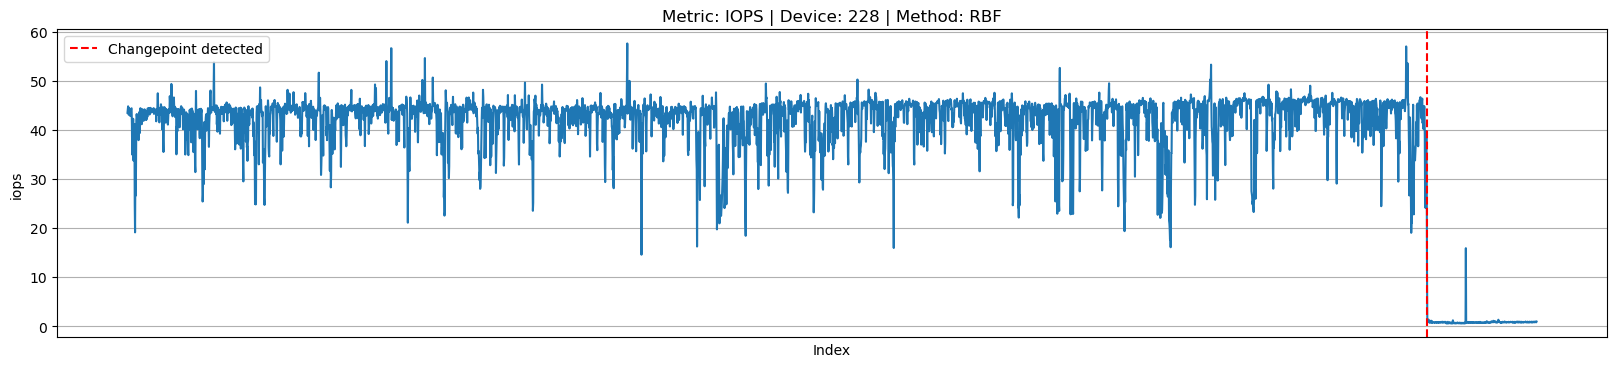

/tmp/ipykernel_3637877/699604834.py:93: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


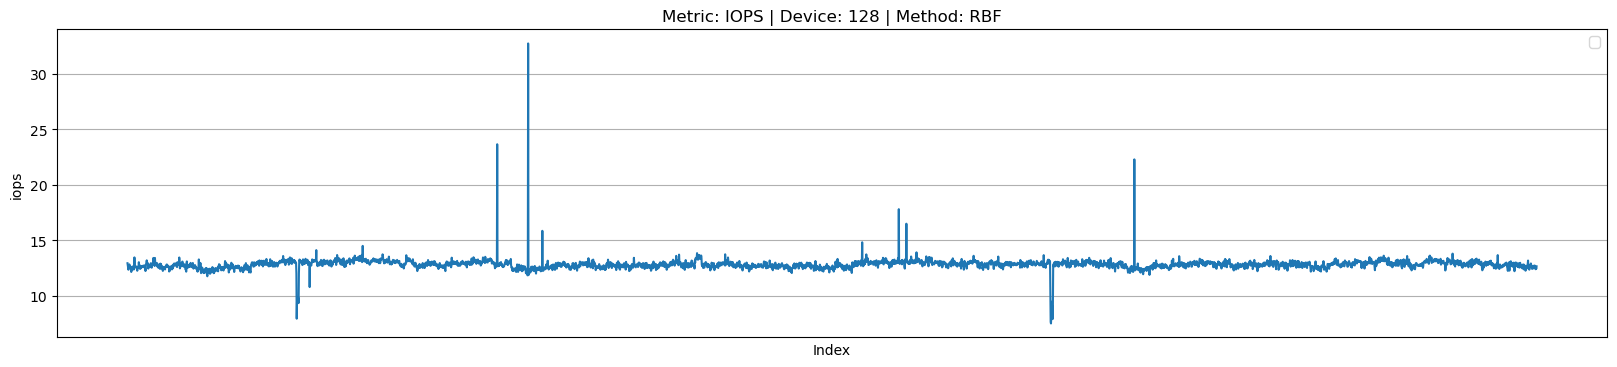

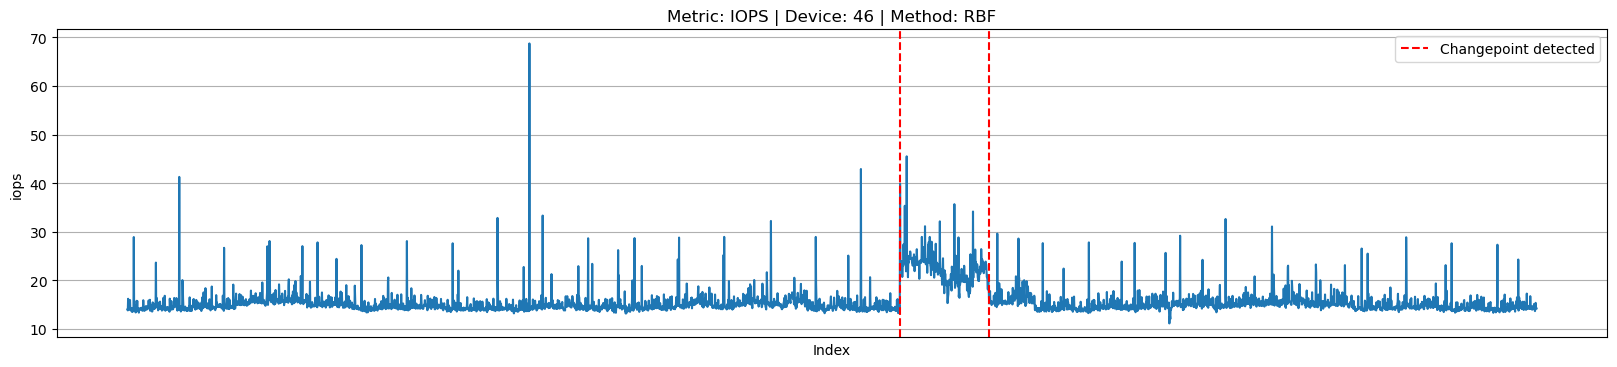

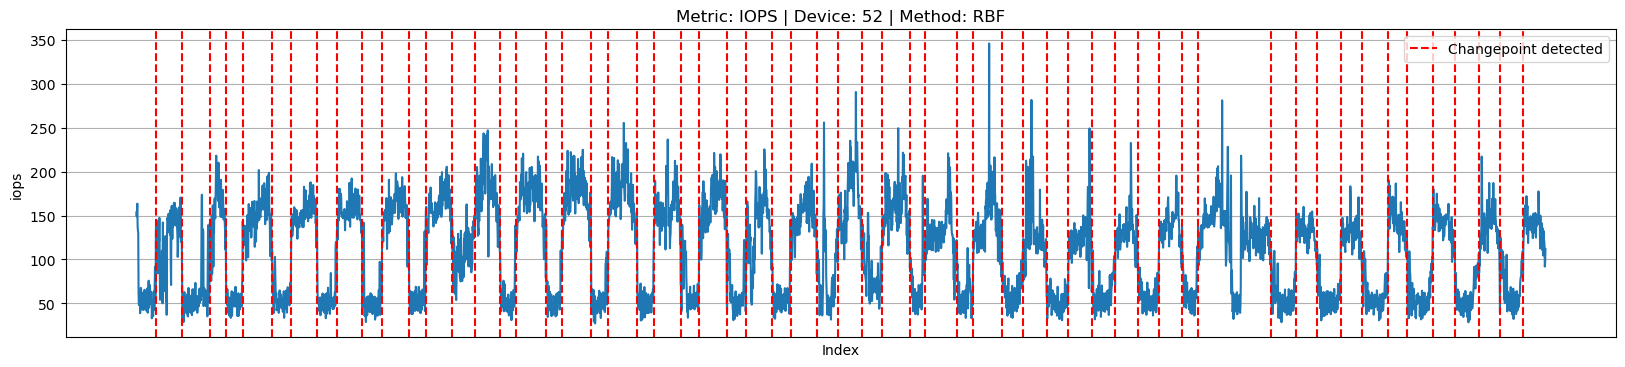

In [1]:
import random
from pathlib import Path
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ruptures
import ruptures as rpt
import numpy as np

metric_to_plot = [
                'iops', 
                # 'iat_avg', 
                # 'size_avg', 
                # 'offset_avg', 
                # 'read_ratio', 
                # 'write_ratio', 
                # 'read_count', 
                # 'write_count'
                ]

metric_detector_pair = {
    'iops': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 17,
        'title': 'RBF'
    },
    'iat_avg': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 15,
        'title': 'RBF'
    },
    'size_avg': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 10,
        'title': 'RBF'
    },
    'offset_avg': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 20,
        'title': 'RBF'
    },
    'read_ratio': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 20,
        'title': 'RBF'
    },
    'write_ratio': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 20,
        'title': 'RBF'
    },
    'read_count': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 15,
        'title': 'RBF'
    }, 
    'write_count': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 15,
        'title': 'RBF'
    }
}

# Function to plot data and detected drifts (changepoints)
def plot_drift_detection(df, metric, device_id, drift_positions, method_name):
    plt.figure(figsize=(20, 4))
    sns.lineplot(data=df, x=df.index, y=metric)
    
    # Plot detected drifts
    for idx, drift_index in enumerate(drift_positions):
        if idx == 0:
            plt.axvline(x=drift_index, color='r', linestyle='--', label='Changepoint detected')
        else:
            plt.axvline(x=drift_index, color='r', linestyle='--')
            
    plt.title(f"Metric: {metric.upper()} | Device: {device_id} | Method: {method_name}")
    plt.xlabel('Index')
    plt.ylabel(metric)
    plt.xticks([])
    plt.grid()
    plt.legend()
    plt.show()

curr = 0
# Load the dataset from the CSV files
path_to_char = '/home/cc/clio/runs/raw/alibaba_loop/characteristic'
for path_10m in Path(path_to_char).rglob("10m"):
    curr += 1
    if curr == 10:
        break
    for path in Path(path_10m).rglob("*.csv"):
        df = pd.read_csv(path)
        minute_from_time = re.search(r"(\d+)m", str(path)).group(1)
        device_id = re.search(r"characteristic/(\d+)", str(path)).group(1)
        
        for metric in metric_to_plot:
            get_metric_options = metric_detector_pair.get(metric)
            
            signal = df[metric].values.reshape(-1, 1) 
            signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))
            
            algo = get_metric_options['detector'].fit(signal)
            my_bkps = algo.predict(pen=get_metric_options['pen'])
            
            # # Plot changepoint detection results
            plot_drift_detection(df, metric, device_id, my_bkps[:-1], get_metric_options['title']) 


In [1]:
import random
from pathlib import Path
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt
import numpy as np
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from openpyxl.utils import get_column_letter
from PIL import Image as PILImage
import io

metric_to_plot = [
                'iops', 
                'size_avg', 
                'offset_avg', 
                'iat_avg', 
                'read_ratio', 
                'write_ratio', 
                'read_count', 
                'write_count'
                ]

columns_to_merge = [
    'num_io',
    'read_count',
    'read_percentage',
    'write_count',
    'write_percentage',
    'avg_offset',
    'avg_size',	
    'ts_max',
    'ts_min',	
    'duration'		
]

metric_detector_pair = {
    'iops': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 17,
        'title': 'RBF'
    },
    'iat_avg': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 15,
        'title': 'RBF'
    },
    'size_avg': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 10,
        'title': 'RBF'
    },
    'offset_avg': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 20,
        'title': 'RBF'
    },
    'read_ratio': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 20,
        'title': 'RBF'
    },
    'write_ratio': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 20,
        'title': 'RBF'
    },
    'read_count': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 15,
        'title': 'RBF'
    }, 
    'write_count': {
        'detector': rpt.KernelCPD(kernel='rbf', min_size=50),
        'pen': 15,
        'title': 'RBF'
    }
}

# Function to detect drift points using ruptures
def detect_drift(df, metric):
    get_metric_options = metric_detector_pair.get(metric)
    
    signal = df[metric].values.reshape(-1, 1)
    signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))
    
    algo = get_metric_options['detector'].fit(signal)
    my_bkps = algo.predict(pen=get_metric_options['pen'])
    
    return my_bkps[:-1]  # Exclude the last point

# Function to calculate drift indices and drift ranges
def calculate_drift_indices_and_ranges(drift_positions, df_col):
    df_length = len(df_col)
    
    if len(drift_positions) == 0:
        return [(0, df_length-1)], [(round(df_col.iloc[0],2), round(df_col.iloc[-1],2))]
    
    drift_indices = [(0, drift_positions[0])] + [(drift_positions[i] + 1, drift_positions[i+1]) for i in range(len(drift_positions)-1)] + [(drift_positions[-1], df_length-1)]
    drift_ranges = [(round(df_col.iloc[i],2), round(df_col.iloc[j],2)) for (i, j) in drift_indices]
    return drift_indices, drift_ranges

# Plot function for per-day image
def plot_per_day(df, metric, device_id, drift_positions, minute_from_time):
    days_per_subplot = 5
    total_minutes = len(df) * int(minute_from_time)
    total_days = total_minutes / 1440
    num_subplots = int(total_days / days_per_subplot) + (1 if total_days % days_per_subplot != 0 else 0)
    
    fig, axs = plt.subplots(num_subplots, 1, figsize=(10, 2 * num_subplots))
    if num_subplots == 1:
        axs = [axs] 
    
    for i in range(num_subplots):
        start_index = i * days_per_subplot * 1440 // int(minute_from_time)
        end_index = start_index + days_per_subplot * 1440 // int(minute_from_time)
        ax = axs[i]
        sns.lineplot(data=df.iloc[start_index:end_index], x=df.index[start_index:end_index], y=metric, ax=ax)
        
        # Add drift points and vertical ticks every day
        for tick in drift_positions:
            if start_index <= tick < end_index:
                ax.axvline(x=tick, color='r', linestyle='--', label='Drift Point')
                
        ax.set_title(f"Metric: {metric.upper()} Device: {device_id} (Days {i*days_per_subplot+1}-{min((i+1)*days_per_subplot, int(total_days))})")
        ax.grid()

    plt.tight_layout()
    return save_plot_to_buffer(fig)

# Plot function for the uncut full picture
def plot_uncut(df, metric, device_id, drift_positions):
    plt.figure(figsize=(20, 4))
    sns.lineplot(data=df, x=df.index, y=metric)
    
    for tick in drift_positions:
        plt.axvline(x=tick, color='r', linestyle='--', label='Drift Point')
    
    plt.title(f"Metric: {metric.upper()} Device: {device_id} (Uncut)")
    plt.grid()
    return save_plot_to_buffer(plt)

# Function to save the plot into a buffer
def save_plot_to_buffer(fig):
    buffer = io.BytesIO()
    fig.savefig(buffer, format='png', bbox_inches='tight')
    plt.close()
    
    buffer.seek(0)
    img = PILImage.open(buffer)
    
    compressed_buffer = io.BytesIO()
    rgb_im = img.convert('RGB')
    rgb_im.save(compressed_buffer, format='JPEG', optimize=True, quality=50)
    
    return compressed_buffer

# Save plot to Excel function
def save_plot_to_excel(ws, row, plot_buffer_per_day, plot_buffer_uncut, device_id, drift_indices, drift_ranges):
    ws[f"A{row}"] = device_id
    
    # Adding drift indices and ranges to the new columns
    ws[f"D{row}"] = str(drift_indices)
    ws[f"E{row}"] = str(drift_ranges)
    
    img_per_day = Image(plot_buffer_per_day)
    img_per_day.width = img_per_day.width // 2
    img_per_day.height = img_per_day.height // 2
    ws.add_image(img_per_day, f"B{row}")
    
    img_uncut = Image(plot_buffer_uncut)
    img_uncut.width = img_uncut.width // 2
    img_uncut.height = img_uncut.height // 2
    ws.add_image(img_uncut, f"C{row}")
    
    ws.row_dimensions[row].height = max(img_per_day.height, img_uncut.height) / 1.2 # Adjust height for each row
    ws.column_dimensions['B'].width = img_per_day.width/6
    ws.column_dimensions['C'].width = img_uncut.width/7
    ws.column_dimensions['D'].width = 30
    ws.column_dimensions['E'].width = 30


def save_additional_info_to_excel(ws, row, drift_indices, df, metric):
    col = 6  
    
    avg_drift_col = col
    var_drift_col = col + 1
    avg_duration_col = col + 2
    max_col = col + 3
    min_col = col + 4

    weighted_averages = []
    weighted_variances = []
    durations = []
    max_vals = []
    min_vals = []

    for idx, drift_range in enumerate(drift_indices):
        start, end = drift_range

        drift_data = df[(df.index >= start) & (df.index <= end)]
        
        weights = drift_data['num_io']
        values = drift_data[metric]
        
        weighted_avg = np.average(values, weights=weights)
        weighted_var = np.average((values - weighted_avg) ** 2, weights=weights)
        
        duration = end - start

        max_val = values.max()
        min_val = values.min()

        weighted_averages.append(weighted_avg)
        weighted_variances.append(np.sqrt(weighted_var))  
        durations.append(duration)
        max_vals.append(max_val)
        min_vals.append(min_val)

    # Write the header name
    ws.cell(row=1, column=avg_drift_col, value="Weighted Average")
    ws.cell(row=1, column=var_drift_col, value="Weighted Variance")
    ws.cell(row=1, column=avg_duration_col, value="Average Duration (10 mins)")
    ws.cell(row=1, column=max_col, value="Max Value")
    ws.cell(row=1, column=min_col, value="Min Value")
    
    ws.cell(row=row, column=avg_drift_col, value=f'[{ ",".join([str(round(avg, 2)) for avg in weighted_averages]) }]')
    ws.cell(row=row, column=var_drift_col, value=f'[{ ",".join([str(round(var, 2)) for var in weighted_variances]) }]')
    
    avg_duration = np.mean(durations)
    ws.cell(row=row, column=avg_duration_col, value=round(avg_duration,2))
    
    overall_max = np.max(max_vals)
    overall_min = np.min(min_vals)
    ws.cell(row=row, column=max_col, value=round(overall_max,2))
    ws.cell(row=row, column=min_col, value=round(overall_min,2))
    

# Main function to handle the data processing and plotting
def main():
    path_to_char = '/home/cc/clio/runs/raw/alibaba_loop/characteristic'
    path_to_merge = '/home/cc/clio/nix-utils/alibaba_device_rw-device_counts.csv'
    workbook = Workbook()
    default_sheet = workbook.active
    workbook.remove(default_sheet)
    
    df_to_merge = pd.read_csv(path_to_merge)

    for metric in metric_to_plot:
        print("METRIC: ", metric)
        count_dev = 20
        ws = workbook.create_sheet(title=metric)
        # set default width for all columns
        for col in range(1, 21):
            ws.column_dimensions[get_column_letter(col)].width = 20 
        
        ws["A1"] = "Device ID"
        ws["B1"] = "Per Day Picture"
        ws["C1"] = "Uncut Picture"
        ws["D1"] = "Drift Indices"
        ws["E1"] = "Drift Ranges"
        
        # Write df to merge columns
        for i, column in enumerate(columns_to_merge):
            ws.cell(row=1, column=11+i, value=f'device_{column}')
        
        row = 2
        
        for path_10m in Path(path_to_char).rglob("10m"):
            for path in Path(path_10m).rglob("*.csv"):
                print(f"{count_dev}: PROCESSING PATH", path)
                df = pd.read_csv(path)
                minute_from_time = re.search(r"(\d+)m", str(path)).group(1)
                device_id = re.search(r"characteristic/(\d+)", str(path)).group(1)
                
                
                drift_positions = detect_drift(df, metric)
                
                # Generate the drift indices and ranges
                drift_indices, drift_ranges = calculate_drift_indices_and_ranges(drift_positions, df[metric])
                
                # Generate the per-day and uncut plots
                plot_buffer_per_day = plot_per_day(df, metric, device_id, drift_positions, minute_from_time)
                plot_buffer_uncut = plot_uncut(df, metric, device_id, drift_positions)
                
                # Save plots and device info to Excel
                save_plot_to_excel(ws, row, plot_buffer_per_day, plot_buffer_uncut, device_id, drift_indices, drift_ranges)
                save_additional_info_to_excel(ws, row, drift_indices, df, metric)
                
                device_row_merge = df_to_merge[df_to_merge['device_id'] == int(device_id)]
                for i, column in enumerate(columns_to_merge):
                    ws.cell(row=row, column=11+i, value=device_row_merge[column].values[0])
                
                row += 1  # Increment row for each entry
                count_dev -= 1
            if count_dev == 0:
                break

    workbook.save("metric_plots_with_drift.xlsx")

if __name__ == "__main__":
    main()


METRIC:  iops
20: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/178/10m/characteristic.csv
19: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/33/10m/characteristic.csv
18: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/234/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


17: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/76/10m/characteristic.csv
16: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/810/10m/characteristic.csv
15: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/228/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


14: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/128/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


13: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/46/10m/characteristic.csv
12: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/52/10m/characteristic.csv
11: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/7/10m/characteristic.csv
10: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/173/10m/characteristic.csv
9: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/276/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


8: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/262/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


7: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/56/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


6: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/207/10m/characteristic.csv
5: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/48/10m/characteristic.csv
4: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/77/10m/characteristic.csv
3: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/49/10m/characteristic.csv
2: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/283/10m/characteristic.csv
1: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/746/10m/characteristic.csv
METRIC:  size_avg
20: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/178/10m/characteristic.csv
19: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/33/10m/characteristic.csv
18: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/234/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


17: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/76/10m/characteristic.csv
16: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/810/10m/characteristic.csv
15: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/228/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


14: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/128/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


13: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/46/10m/characteristic.csv
12: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/52/10m/characteristic.csv
11: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/7/10m/characteristic.csv
10: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/173/10m/characteristic.csv
9: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/276/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


8: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/262/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


7: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/56/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


6: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/207/10m/characteristic.csv
5: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/48/10m/characteristic.csv
4: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/77/10m/characteristic.csv
3: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/49/10m/characteristic.csv
2: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/283/10m/characteristic.csv
1: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/746/10m/characteristic.csv
METRIC:  offset_avg
20: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/178/10m/characteristic.csv
19: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/33/10m/characteristic.csv
18: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/234/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


17: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/76/10m/characteristic.csv
16: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/810/10m/characteristic.csv
15: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/228/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


14: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/128/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


13: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/46/10m/characteristic.csv
12: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/52/10m/characteristic.csv
11: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/7/10m/characteristic.csv
10: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/173/10m/characteristic.csv
9: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/276/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


8: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/262/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


7: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/56/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


6: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/207/10m/characteristic.csv
5: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/48/10m/characteristic.csv
4: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/77/10m/characteristic.csv
3: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/49/10m/characteristic.csv
2: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/283/10m/characteristic.csv
1: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/746/10m/characteristic.csv
METRIC:  iat_avg
20: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/178/10m/characteristic.csv
19: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/33/10m/characteristic.csv
18: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/234/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


17: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/76/10m/characteristic.csv
16: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/810/10m/characteristic.csv
15: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/228/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


14: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/128/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


13: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/46/10m/characteristic.csv
12: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/52/10m/characteristic.csv
11: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/7/10m/characteristic.csv
10: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/173/10m/characteristic.csv
9: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/276/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


8: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/262/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


7: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/56/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


6: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/207/10m/characteristic.csv
5: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/48/10m/characteristic.csv
4: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/77/10m/characteristic.csv
3: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/49/10m/characteristic.csv
2: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/283/10m/characteristic.csv
1: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/746/10m/characteristic.csv
METRIC:  read_ratio
20: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/178/10m/characteristic.csv
19: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/33/10m/characteristic.csv
18: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/234/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


17: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/76/10m/characteristic.csv
16: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/810/10m/characteristic.csv
15: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/228/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


14: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/128/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


13: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/46/10m/characteristic.csv
12: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/52/10m/characteristic.csv
11: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/7/10m/characteristic.csv
10: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/173/10m/characteristic.csv
9: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/276/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


8: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/262/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


7: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/56/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


6: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/207/10m/characteristic.csv
5: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/48/10m/characteristic.csv
4: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/77/10m/characteristic.csv
3: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/49/10m/characteristic.csv
2: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/283/10m/characteristic.csv
1: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/746/10m/characteristic.csv
METRIC:  write_ratio
20: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/178/10m/characteristic.csv
19: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/33/10m/characteristic.csv
18: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/234/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


17: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/76/10m/characteristic.csv
16: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/810/10m/characteristic.csv
15: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/228/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


14: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/128/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


13: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/46/10m/characteristic.csv
12: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/52/10m/characteristic.csv
11: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/7/10m/characteristic.csv
10: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/173/10m/characteristic.csv
9: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/276/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


8: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/262/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


7: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/56/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


6: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/207/10m/characteristic.csv
5: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/48/10m/characteristic.csv
4: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/77/10m/characteristic.csv
3: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/49/10m/characteristic.csv
2: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/283/10m/characteristic.csv
1: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/746/10m/characteristic.csv
METRIC:  read_count
20: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/178/10m/characteristic.csv
19: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/33/10m/characteristic.csv
18: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/234/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


17: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/76/10m/characteristic.csv
16: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/810/10m/characteristic.csv
15: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/228/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


14: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/128/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


13: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/46/10m/characteristic.csv
12: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/52/10m/characteristic.csv
11: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/7/10m/characteristic.csv
10: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/173/10m/characteristic.csv
9: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/276/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


8: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/262/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


7: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/56/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


6: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/207/10m/characteristic.csv
5: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/48/10m/characteristic.csv
4: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/77/10m/characteristic.csv
3: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/49/10m/characteristic.csv
2: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/283/10m/characteristic.csv
1: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/746/10m/characteristic.csv
METRIC:  write_count
20: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/178/10m/characteristic.csv
19: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/33/10m/characteristic.csv
18: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/234/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


17: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/76/10m/characteristic.csv
16: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/810/10m/characteristic.csv
15: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/228/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


14: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/128/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


13: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/46/10m/characteristic.csv
12: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/52/10m/characteristic.csv
11: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/7/10m/characteristic.csv
10: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/173/10m/characteristic.csv
9: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/276/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


8: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/262/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


7: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/56/10m/characteristic.csv


/tmp/ipykernel_3641652/1889634783.py:274: DtypeWarning: Columns (352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


6: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/207/10m/characteristic.csv
5: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/48/10m/characteristic.csv
4: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/77/10m/characteristic.csv
3: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/49/10m/characteristic.csv
2: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/283/10m/characteristic.csv
1: PROCESSING PATH /home/cc/clio/runs/raw/alibaba_loop/characteristic/746/10m/characteristic.csv
